In [1]:
from __future__ import annotations

import argparse
from logging import INFO, FileHandler, getLogger

import yaml

from config.config import Config
from src.data_collaboration import DataCollaborationAnalysis
from src.load_data import load_data # , load_data_breast_cancer, load_data_diabetes, load_data_har
from src.paths import CONFIG_DIR, INPUT_DIR, OUTPUT_DIR
from src.institutional_analysis import centralize_analysis, dca_analysis, individual_analysis

import sys
sys.argv = ["notebook", "exp004"]
parser = argparse.ArgumentParser()
parser.add_argument("name", type=str)
args = parser.parse_args()


import os 
child_path = os.getcwd()
# 親ディレクトリを取得
parent_path = os.path.dirname(child_path)

# カレントディレクトリを移動
os.chdir(parent_path)

# 引数の設定
parser = argparse.ArgumentParser()
parser.add_argument("name", type=str, default="exp004")
args = parser.parse_args()
# yaml のパスと出力先パス
cfg_path    = CONFIG_DIR / f"{args.name}.yaml"
output_path = OUTPUT_DIR / args.name

# UTF-8 で読み込んで Config を生成
with cfg_path.open(encoding="utf-8") as f:
    cfg_dict = yaml.safe_load(f)

config = Config(**cfg_dict,
                output_path=output_path,
                input_path=INPUT_DIR)


# 出力ディレクトリ作成
output_path.mkdir(parents=True, exist_ok=True)

# ログの設定
logger = getLogger(__name__)
logger.setLevel(INFO)
handler = FileHandler(filename=config.output_path / "result.log", encoding="utf-8")
logger.addHandler(handler)
# UTF-8 で読み込んで Config を生成
with cfg_path.open(encoding="utf-8") as f:
    cfg_dict = yaml.safe_load(f)

train_df, test_df = load_data(config=config)
train_df

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,target
0,5.313,3.4571,1,0,0,0,2,35.3,0,4,...,2,0,2,4.735,3.477,0,9.513,0,0,1
1,4.517,2.6567,1,0,0,0,1,44.4,1,0,...,0,0,0,3.622,2.086,0,8.370,0,1,0
2,4.985,2.5536,0,0,3,0,3,50.0,0,0,...,1,2,2,3.765,2.077,1,8.528,0,0,0
3,3.902,2.6931,2,0,0,0,0,30.8,2,0,...,0,0,0,3.547,2.022,0,8.444,0,2,0
4,4.414,3.4137,0,0,0,0,0,33.3,2,2,...,0,0,0,3.426,3.262,0,7.758,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,4.982,2.8025,0,0,2,0,2,50.0,0,2,...,0,2,1,3.853,2.833,1,8.508,0,0,1
516,4.732,3.2417,0,0,2,0,2,37.5,0,0,...,2,4,4,3.655,2.417,2,7.973,0,0,0
517,4.887,2.2910,2,0,2,0,6,44.8,0,0,...,4,4,4,3.954,2.337,2,9.239,0,2,0
518,4.380,3.3996,0,0,0,0,0,30.8,1,4,...,0,0,1,3.379,3.028,0,8.090,0,0,1


In [ ]:
# 先ほどの KCCA 関数群をもう一度定義
import pandas as pd

# CSVを読み込み
df = pd.read_csv(r"C:\Users\sueya\Git-Repositories\takano_labo\dca_yanagi\input\Three_Organization_Dataset.csv")
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
import numpy as np # 特徴量 x1, x2 とラベル y を抽出

df_sample = df.sample(n=400, random_state=42)  # 400点だけ使用

X = df_sample[["x1", "x2"]].values
y = df_sample["y"].values
Y = np.zeros((len(y), len(np.unique(y))))
Y[np.arange(len(y)), y] = 1

# Kernel CCA 実行
fit = kcca_fit(X, Y, lam_x=1e-3, lam_y=1e-3, n_comp=2)
X_kcca = kcca_transform_X(fit, X)

# プロット
plt.figure(figsize=(7,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap="tab10", s=20)
plt.title("Original data (x1, x2, sampled 400)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

plt.figure(figsize=(7,6))
plt.scatter(X_kcca[:,0], X_kcca[:,1], c=y, cmap="tab10", s=20)
plt.title("After Kernel CCA (RBF on X, linear on Y, sampled 400)")
plt.xlabel("KCCA1"); plt.ylabel("KCCA2")
plt.show()

X = df[["x1", "x2"]].values
y = df["y"].values

# ワンホットエンコーディング
Y = np.zeros((len(y), len(np.unique(y))))
Y[np.arange(len(y)), y] = 1


def center_gram(K):
    n = K.shape[0]
    H = np.eye(n) - np.ones((n,n))/n
    return H @ K @ H, H

def rbf_kernel(A, B, gamma):
    A2 = np.sum(A*A, axis=1, keepdims=True)
    B2 = np.sum(B*B, axis=1, keepdims=True).T
    sq = A2 + B2 - 2*A@B.T
    return np.exp(-gamma * np.clip(sq, 0, None))

def linear_kernel(A, B):
    return A @ B.T

def median_heuristic_gamma(X):
    D = np.sum(X*X,1,keepdims=True) + np.sum(X*X,1,keepdims=True).T - 2*X@X.T
    d = np.sqrt(np.clip(D, 0, None))
    med = np.median(d[d>0])
    if med <= 0 or not np.isfinite(med):
        med = 1.0
    return 1.0/(2.0*med*med)

def kcca_fit(X, Y, lam_x=1e-3, lam_y=1e-3, n_comp=2):
    gamma_x = median_heuristic_gamma(X)
    Kx = rbf_kernel(X, X, gamma_x)
    Ky = linear_kernel(Y, Y)

    Kx, H = center_gram(Kx)
    Ky, _ = center_gram(Ky)

    n = X.shape[0]
    Ax = Kx + lam_x*np.eye(n)
    Ay = Ky + lam_y*np.eye(n)

    ex, Ux = np.linalg.eigh(Ax)
    ey, Uy = np.linalg.eigh(Ay)
    ex = np.clip(ex, 1e-10, None)
    ey = np.clip(ey, 1e-10, None)
    Ax_invhalf = (Ux * (ex**-0.5)) @ Ux.T
    Ay_invhalf = (Uy * (ey**-0.5)) @ Uy.T

    C = Ax_invhalf @ Kx @ Ky @ Ay_invhalf
    U, S, Vt = np.linalg.svd(C, full_matrices=False)
    U = U[:, :n_comp]; Vt = Vt[:n_comp, :]; S = S[:n_comp]

    alpha = Ax_invhalf @ U
    beta  = Ay_invhalf @ Vt.T
    return {"alpha": alpha, "beta": beta, "H": H, "X": X, "Y": Y, "gamma_x": gamma_x, "Svals": S}

def kcca_transform_X(fit, Xnew):
    X = fit["X"]; alpha = fit["alpha"]; H = fit["H"]; gamma_x = fit["gamma_x"]
    Kx_new = rbf_kernel(Xnew, X, gamma_x)
    r = Kx_new.shape[0]
    Hr = np.eye(r) - np.ones((r,r))/r
    Kx_new_c = Hr @ (Kx_new @ H)
    U_new = Kx_new_c @ alpha
    return U_new

# ---- もう一度 Kernel CCA 適用 ----
X = df[["x1", "x2"]].values
y = df["y"].values
Y = np.zeros((len(y), len(np.unique(y))))
Y[np.arange(len(y)), y] = 1

fit = kcca_fit(X, Y, lam_x=1e-3, lam_y=1e-3, n_comp=2)
X_kcca = kcca_transform_X(fit, X)

# プロット
plt.figure(figsize=(7,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap="tab10", s=20)
plt.title("Original data (x1, x2)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

plt.figure(figsize=(7,6))
plt.scatter(X_kcca[:,0], X_kcca[:,1], c=y, cmap="tab10", s=20)
plt.title("After Kernel CCA (RBF on X, linear on Y)")
plt.xlabel("KCCA1"); plt.ylabel("KCCA2")
plt.show()


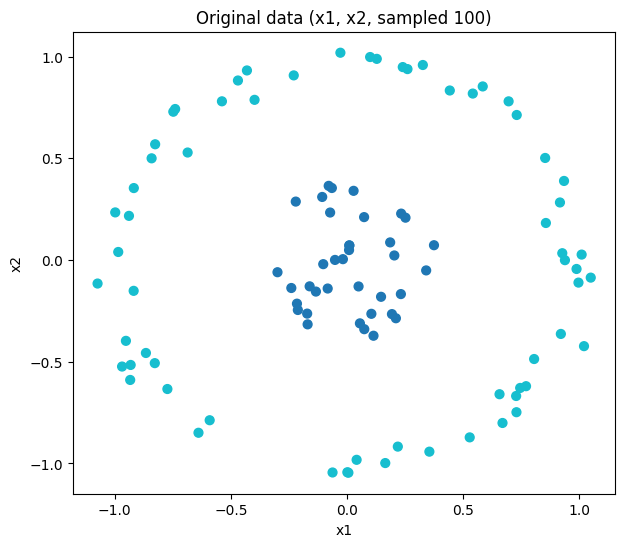

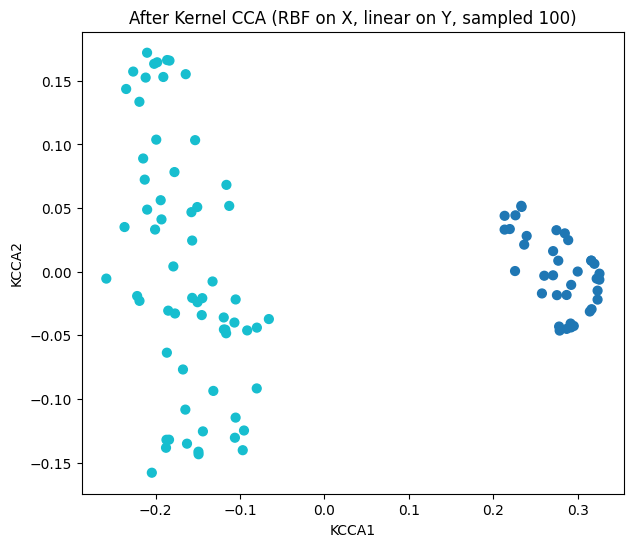

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ====== Kernel CCA 関数群 ======
def center_gram(K):
    n = K.shape[0]
    H = np.eye(n) - np.ones((n,n))/n
    return H @ K @ H, H

def rbf_kernel(A, B, gamma):
    A2 = np.sum(A*A, axis=1, keepdims=True)
    B2 = np.sum(B*B, axis=1, keepdims=True).T
    sq = A2 + B2 - 2*A@B.T
    return np.exp(-gamma * np.clip(sq, 0, None))

def linear_kernel(A, B):
    return A @ B.T

def median_heuristic_gamma(X):
    D = np.sum(X*X,1,keepdims=True) + np.sum(X*X,1,keepdims=True).T - 2*X@X.T
    d = np.sqrt(np.clip(D, 0, None))
    med = np.median(d[d>0])
    if med <= 0 or not np.isfinite(med):
        med = 1.0
    return 1.0/(2.0*med*med)

def kcca_fit(X, Y, lam_x=1e-3, lam_y=1e-3, n_comp=2):
    gamma_x = median_heuristic_gamma(X)
    Kx = rbf_kernel(X, X, gamma_x)
    Ky = linear_kernel(Y, Y)

    Kx, H = center_gram(Kx)
    Ky, _ = center_gram(Ky)

    n = X.shape[0]
    Ax = Kx + lam_x*np.eye(n)
    Ay = Ky + lam_y*np.eye(n)

    ex, Ux = np.linalg.eigh(Ax)
    ey, Uy = np.linalg.eigh(Ay)
    ex = np.clip(ex, 1e-10, None)
    ey = np.clip(ey, 1e-10, None)
    Ax_invhalf = (Ux * (ex**-0.5)) @ Ux.T
    Ay_invhalf = (Uy * (ey**-0.5)) @ Uy.T

    C = Ax_invhalf @ Kx @ Ky @ Ay_invhalf
    U, S, Vt = np.linalg.svd(C, full_matrices=False)
    U = U[:, :n_comp]; Vt = Vt[:n_comp, :]; S = S[:n_comp]

    alpha = Ax_invhalf @ U
    beta  = Ay_invhalf @ Vt.T
    return {"alpha": alpha, "beta": beta, "H": H, "X": X, "Y": Y, "gamma_x": gamma_x, "Svals": S}

def kcca_transform_X(fit, Xnew):
    X = fit["X"]; alpha = fit["alpha"]; H = fit["H"]; gamma_x = fit["gamma_x"]
    Kx_new = rbf_kernel(Xnew, X, gamma_x)
    r = Kx_new.shape[0]
    Hr = np.eye(r) - np.ones((r,r))/r
    Kx_new_c = Hr @ (Kx_new @ H)
    U_new = Kx_new_c @ alpha
    return U_new

# ====== CSV読込とサンプリング ======
df = pd.read_csv(r"C:\Users\sueya\Git-Repositories\takano_labo\dca_yanagi\input\Three_Organization_Dataset.csv")
df_sample = df.sample(n=100, random_state=42)

X = df_sample[["x1", "x2"]].values
y = df_sample["y"].values

# One-hot
Y = np.zeros((len(y), len(np.unique(y))))
Y[np.arange(len(y)), y] = 1

# ====== Kernel CCA ======
fit = kcca_fit(X, Y, lam_x=1e-3, lam_y=1e-3, n_comp=2)
X_kcca = kcca_transform_X(fit, X)

# ====== プロット ======
plt.figure(figsize=(7,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap="tab10", s=40)
plt.title("Original data (x1, x2, sampled 100)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

plt.figure(figsize=(7,6))
plt.scatter(X_kcca[:,0], X_kcca[:,1], c=y, cmap="tab10", s=40)
plt.title("After Kernel CCA (RBF on X, linear on Y, sampled 100)")
plt.xlabel("KCCA1"); plt.ylabel("KCCA2")
plt.show()

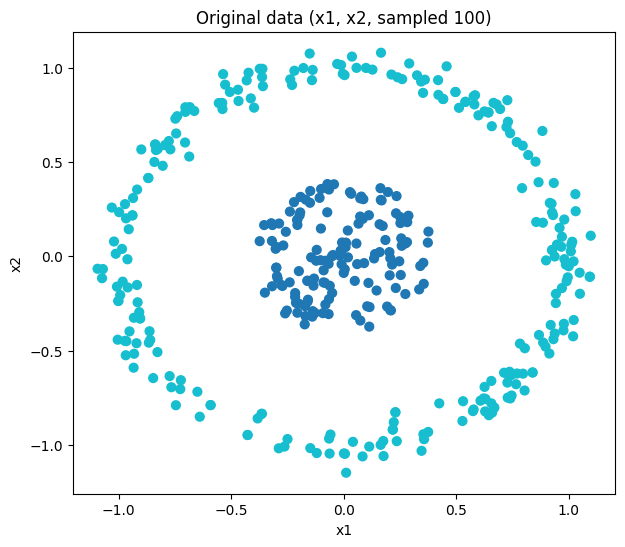

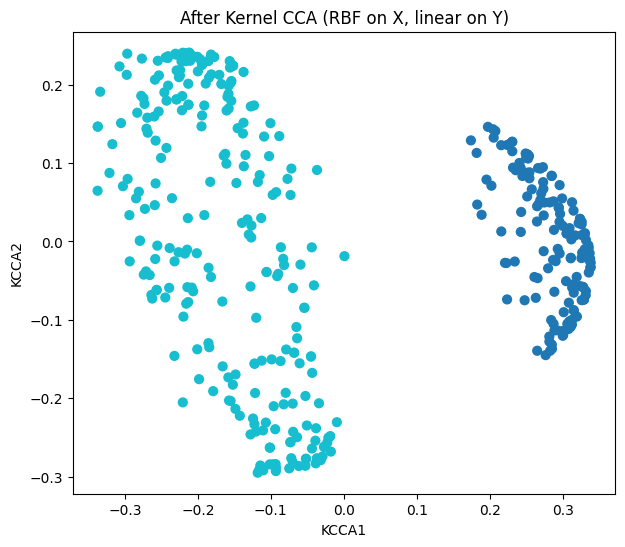

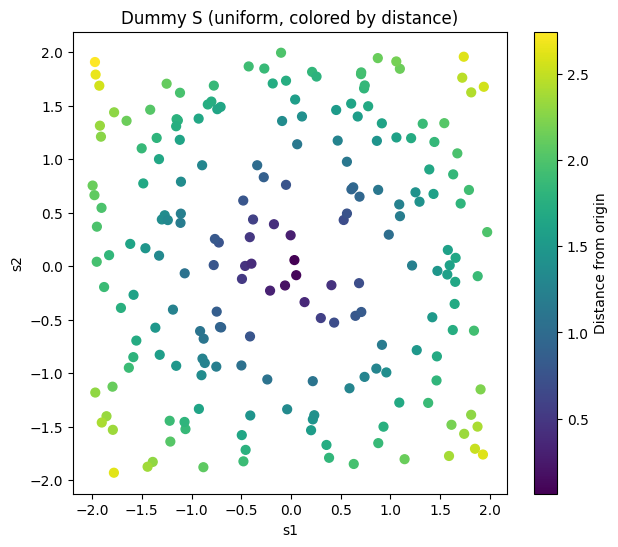

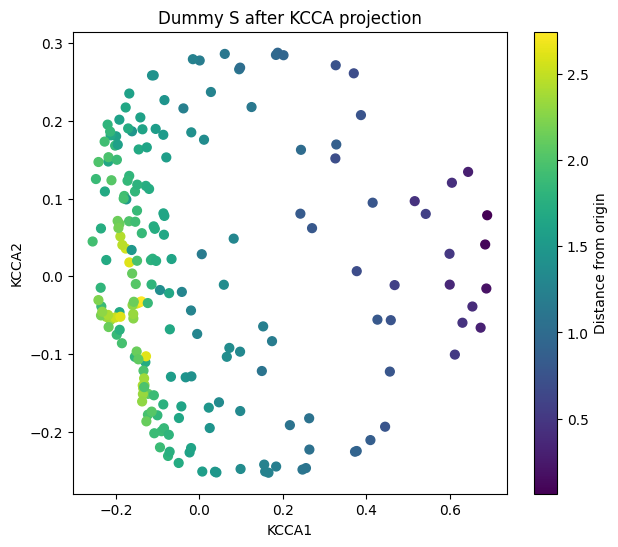

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ====== Kernel CCA 関数群 ======
def center_gram(K):
    n = K.shape[0]
    H = np.eye(n) - np.ones((n,n))/n
    return H @ K @ H, H

def rbf_kernel(A, B, gamma):
    A2 = np.sum(A*A, axis=1, keepdims=True)
    B2 = np.sum(B*B, axis=1, keepdims=True).T
    sq = A2 + B2 - 2*A@B.T
    return np.exp(-gamma * np.clip(sq, 0, None))

def linear_kernel(A, B):
    return A @ B.T

def median_heuristic_gamma(X):
    D = np.sum(X*X,1,keepdims=True) + np.sum(X*X,1,keepdims=True).T - 2*X@X.T
    d = np.sqrt(np.clip(D, 0, None))
    med = np.median(d[d>0])
    if med <= 0 or not np.isfinite(med):
        med = 1.0
    return 1.0/(2.0*med*med)

def kcca_fit(X, Y, lam_x=1e-3, lam_y=1e-3, n_comp=2):
    gamma_x = median_heuristic_gamma(X)
    Kx = rbf_kernel(X, X, gamma_x)
    Ky = linear_kernel(Y, Y)

    Kx, H = center_gram(Kx)
    Ky, _ = center_gram(Ky)

    n = X.shape[0]
    Ax = Kx + lam_x*np.eye(n)
    Ay = Ky + lam_y*np.eye(n)

    ex, Ux = np.linalg.eigh(Ax)
    ey, Uy = np.linalg.eigh(Ay)
    ex = np.clip(ex, 1e-10, None)
    ey = np.clip(ey, 1e-10, None)
    Ax_invhalf = (Ux * (ex**-0.5)) @ Ux.T
    Ay_invhalf = (Uy * (ey**-0.5)) @ Uy.T

    C = Ax_invhalf @ Kx @ Ky @ Ay_invhalf
    U, S, Vt = np.linalg.svd(C, full_matrices=False)
    U = U[:, :n_comp]; Vt = Vt[:n_comp, :]; S = S[:n_comp]

    alpha = Ax_invhalf @ U
    beta  = Ay_invhalf @ Vt.T
    return {"alpha": alpha, "beta": beta, "H": H, "X": X, "Y": Y, "gamma_x": gamma_x, "Svals": S}

def kcca_transform_X(fit, Xnew):
    X = fit["X"]; alpha = fit["alpha"]; H = fit["H"]; gamma_x = fit["gamma_x"]
    Kx_new = rbf_kernel(Xnew, X, gamma_x)
    r = Kx_new.shape[0]
    Hr = np.eye(r) - np.ones((r,r))/r
    Kx_new_c = Hr @ (Kx_new @ H)
    U_new = Kx_new_c @ alpha
    return U_new

# ====== CSV読込とサンプリング ======
df = pd.read_csv(r"C:\Users\sueya\Git-Repositories\takano_labo\dca_yanagi\input\Three_Organization_Dataset.csv")
df_sample = df.sample(n=400, random_state=42)

X = df_sample[["x1", "x2"]].values
y = df_sample["y"].values

# One-hot
Y = np.zeros((len(y), len(np.unique(y))))
Y[np.arange(len(y)), y] = 1

# ====== Kernel CCA ======
fit = kcca_fit(X, Y, lam_x=1e-3, lam_y=1e-3, n_comp=2)
X_kcca = kcca_transform_X(fit, X)

# ====== ダミーデータ S ======
n_dummy = 200
S = np.random.uniform(low=-2, high=2, size=(n_dummy, 2))
dist = np.sqrt(np.sum(S**2, axis=1))  # 中心からの距離
colors = dist  # 色を距離で付与
S_kcca = kcca_transform_X(fit, S)

# ====== プロット ======
# 元データ
plt.figure(figsize=(7,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap="tab10", s=40)
plt.title("Original data (x1, x2, sampled 100)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

# KCCA後
plt.figure(figsize=(7,6))
plt.scatter(X_kcca[:,0], X_kcca[:,1], c=y, cmap="tab10", s=40)
plt.title("After Kernel CCA (RBF on X, linear on Y)")
plt.xlabel("KCCA1"); plt.ylabel("KCCA2")
plt.show()

# ダミーデータ（元）
plt.figure(figsize=(7,6))
plt.scatter(S[:,0], S[:,1], c=colors, cmap="viridis", s=40)
plt.colorbar(label="Distance from origin")
plt.title("Dummy S (uniform, colored by distance)")
plt.xlabel("s1"); plt.ylabel("s2")
plt.show()

# ダミーデータ（KCCA後）
plt.figure(figsize=(7,6))
plt.scatter(S_kcca[:,0], S_kcca[:,1], c=colors, cmap="viridis", s=40)
plt.colorbar(label="Distance from origin")
plt.title("Dummy S after KCCA projection")
plt.xlabel("KCCA1"); plt.ylabel("KCCA2")
plt.show()


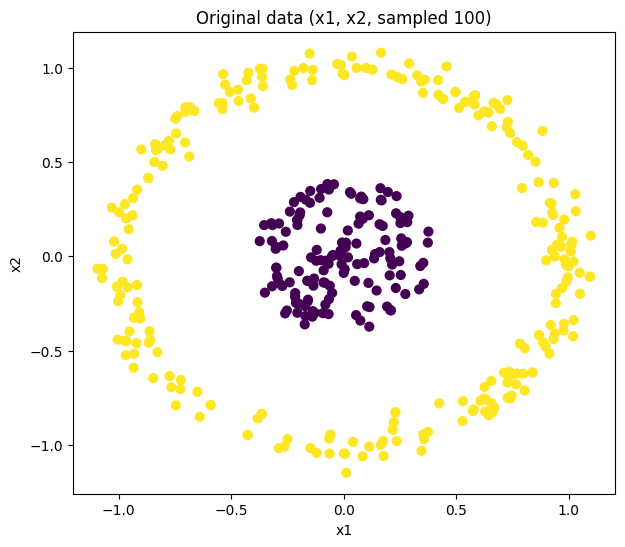

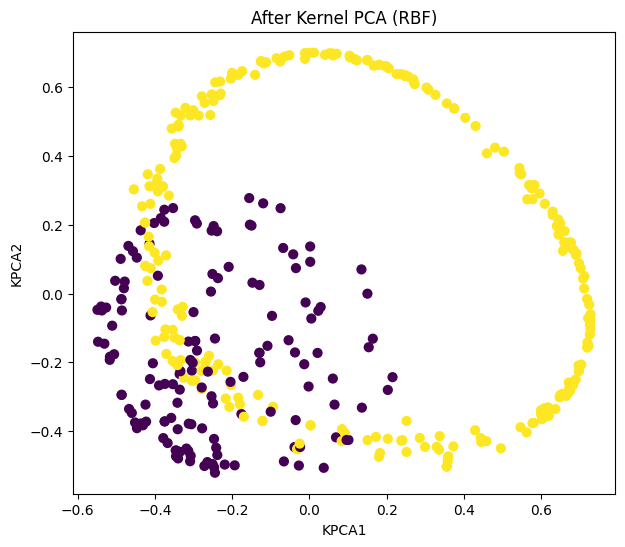

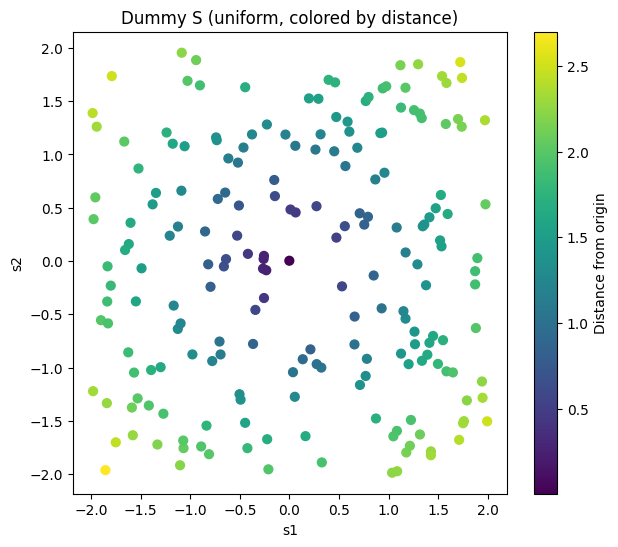

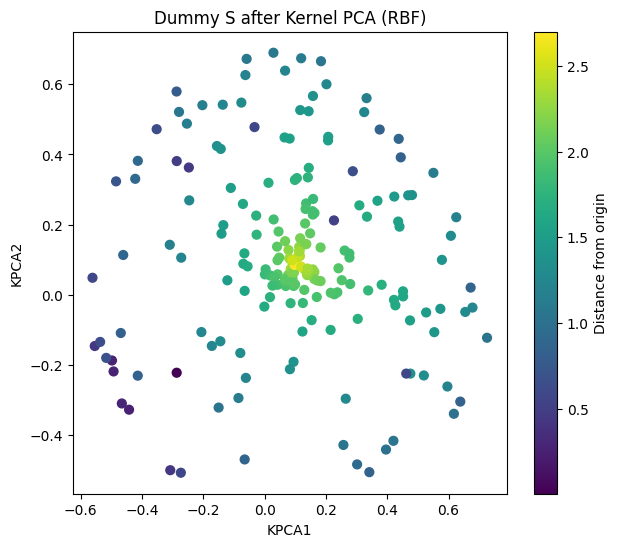

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA

# ---- Helpers ----
def median_heuristic_gamma(X):
    D = np.sum(X*X,1,keepdims=True) + np.sum(X*X,1,keepdims=True).T - 2*X@X.T
    d = np.sqrt(np.clip(D, 0, None))
    med = np.median(d[d>0])
    if med <= 0 or not np.isfinite(med):
        med = 1.0
    return 1.0/(2.0*med*med)

# ---- Load & sample ----
df_sample = df.sample(n=400, random_state=42)

X = df_sample[["x1", "x2"]].values
y = df_sample["y"].values

# ---- Kernel PCA (RBF) ----
gamma = median_heuristic_gamma(X)*3
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=gamma, fit_inverse_transform=False)
X_kpca = kpca.fit_transform(X)

# ---- Dummy S (uniform), color by distance from origin ----
n_dummy = 200
S = np.random.uniform(low=-2, high=2, size=(n_dummy, 2))
dist = np.sqrt(np.sum(S**2, axis=1))
S_kpca = kpca.transform(S)

# ---- Plots (each chart its own figure) ----

# Original X
plt.figure(figsize=(7,6))
plt.scatter(X[:,0], X[:,1], c=y, s=40)
plt.title("Original data (x1, x2, sampled 100)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

# After Kernel PCA (X -> 2D)
plt.figure(figsize=(7,6))
plt.scatter(X_kpca[:,0], X_kpca[:,1], c=y, s=40)
plt.title("After Kernel PCA (RBF)")
plt.xlabel("KPCA1"); plt.ylabel("KPCA2")
plt.show()

# Dummy S (color by distance from origin)
plt.figure(figsize=(7,6))
plt.scatter(S[:,0], S[:,1], c=dist, s=40)
plt.colorbar(label="Distance from origin")
plt.title("Dummy S (uniform, colored by distance)")
plt.xlabel("s1"); plt.ylabel("s2")
plt.show()

# Dummy S after KPCA
plt.figure(figsize=(7,6))
plt.scatter(S_kpca[:,0], S_kpca[:,1], c=dist, s=40)
plt.colorbar(label="Distance from origin")
plt.title("Dummy S after Kernel PCA (RBF)")
plt.xlabel("KPCA1"); plt.ylabel("KPCA2")
plt.show()


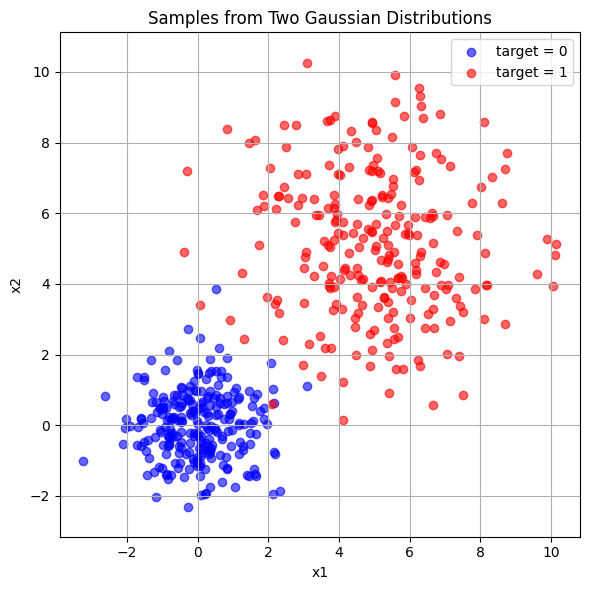

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def _load_concentric_circles_df(n_samples: int = 500) -> pd.DataFrame:
    np.random.seed(42)  # 再現性のためにシード固定

    # 分布1: 中心 (0, 0), 単位分散
    n1 = n_samples // 2
    mean1 = np.array([0, 0])
    cov1 = np.eye(2)
    X1 = np.random.multivariate_normal(mean1, cov1, size=n1)
    y1 = np.zeros(n1, dtype=int)

    # 分布2: 中心 (5, 5), 分散2
    n2 = n_samples - n1
    mean2 = np.array([5, 5])
    cov2 = 4 * np.eye(2)
    X2 = np.random.multivariate_normal(mean2, cov2, size=n2)
    y2 = np.ones(n2, dtype=int)

    # 結合
    X = np.vstack((X1, X2))
    y = np.concatenate((y1, y2))

    df = pd.DataFrame(X, columns=["x1", "x2"])
    df["target"] = y
    return df

# ---------- データ生成 ----------
df = _load_concentric_circles_df()

# ---------- 可視化 ----------
plt.figure(figsize=(6, 6))
for label, color in zip([0, 1], ['blue', 'red']):
    subset = df[df['target'] == label]
    plt.scatter(subset['x1'], subset['x2'], label=f"target = {label}", color=color, alpha=0.6)

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Samples from Two Gaussian Distributions")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.tight_layout()
plt.show()
df.to_csv("Two_Gaussian_Distributions.csv", index=False)

In [8]:
import numpy as np
import pandas as pd

def _load_3d_gaussian_clusters_df(n_samples: int = 600) -> pd.DataFrame:
    np.random.seed(42)
    n_per_class = n_samples // 3

    # 分布1: 中心 (0, 0, 0)
    mean1 = [0, 0, 0]
    cov1 = np.eye(3)
    X1 = np.random.multivariate_normal(mean1, cov1, size=n_per_class)
    y1 = np.zeros(n_per_class, dtype=int)

    # 分布2: 中心 (5, 5, 5)
    mean2 = [5, 5, 5]
    cov2 = np.eye(3) * 1.5
    X2 = np.random.multivariate_normal(mean2, cov2, size=n_per_class)
    y2 = np.ones(n_per_class, dtype=int)

    # 分布3: 中心 (-5, 5, -5)
    mean3 = [-5, 5, -5]
    cov3 = np.eye(3) * 2
    X3 = np.random.multivariate_normal(mean3, cov3, size=n_samples - 2*n_per_class)
    y3 = np.full(n_samples - 2*n_per_class, 2, dtype=int)

    # 結合
    X = np.vstack((X1, X2, X3))
    y = np.concatenate((y1, y2, y3))

    df = pd.DataFrame(X, columns=["x1", "x2", "x3"])
    df["target"] = y
    return df


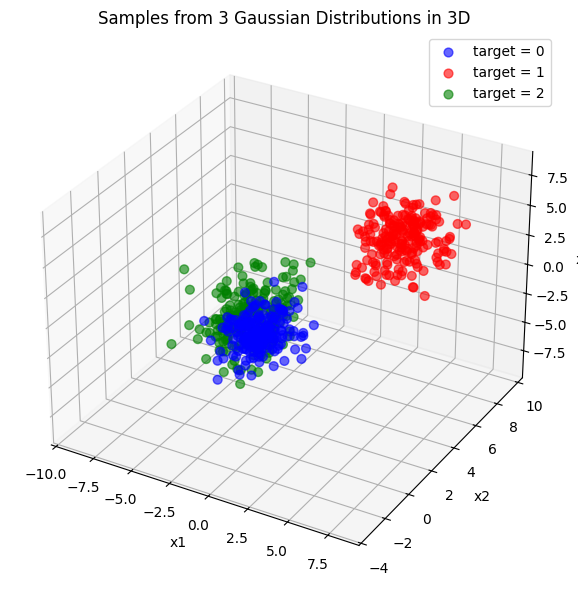

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 必須

# データ生成
df = _load_3d_gaussian_clusters_df()

# 可視化
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'red', 'green']
for label in df["target"].unique():
    subset = df[df["target"] == label]
    ax.scatter(subset["x1"], subset["x2"], subset["x3"],
               label=f"target = {label}", color=colors[label], alpha=0.6, s=40)

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")
ax.set_title("Samples from 3 Gaussian Distributions in 3D")
ax.legend()
plt.tight_layout()
plt.show()
df.to_csv("3D_Gaussian_Clusters.csv", index=False)


In [5]:
df 

,x1,x2,target
0,0.496714,-0.138264,0
1,0.647689,1.523030,0
2,-0.234153,-0.234137,0
3,1.579213,0.767435,0
4,-0.469474,0.542560,0
...,...,...,...
495,5.416766,0.916530,1
496,4.505645,3.636032,1
497,2.996760,4.437799,1
498,8.595373,6.281686,1


In [ ]:
import numpy as np
import pandas as pd

def _load_3d_8gaussian_clusters_df(n_samples: int = 8000) -> pd.DataFrame:
    np.random.seed(42)
    n_per_class = n_samples // 8

    means = [
        [0, 0, 0],
        [5, 5, 5],
        [-5, 5, -5],
        [5, -5, 5],
        [-5, -5, -5],
        [7, 0, -7],
        [-7, 7, 0],
        [0, -7, 7]
    ]

    cov = np.eye(3) * 3  # 全クラスタで共通の分散

    X_all = []
    y_all = []

    for i, mean in enumerate(means):
        X = np.random.multivariate_normal(mean, cov, size=n_per_class)
        y = np.full(n_per_class, i)
        X_all.append(X)
        y_all.append(y)

    X = np.vstack(X_all)
    y = np.concatenate(y_all)

    df = pd.DataFrame(X, columns=["x1", "x2", "x3"])
    df["target"] = y
    return df


In [17]:
import numpy as np
import pandas as pd

def _load_3d_8gaussian_clusters_df(n_samples: int = 8000) -> pd.DataFrame:
    np.random.seed(42)
    n_per_class = n_samples // 8

    means = [
        [0, 0, 0],
        [5, 5, 5],
        [-5, 5, -5],
        [5, -5, 5],
        [-5, -5, -5],
        [7, 0, -7],
        [-7, 7, 0],
        [0, -7, 7]
    ]

    cov = np.eye(3)  /3# 全クラスタで共通の分散

    X_all = []
    y_all = []

    for i, mean in enumerate(means):
        X = np.random.multivariate_normal(mean, cov, size=n_per_class)
        y = np.full(n_per_class, i)
        X_all.append(X)
        y_all.append(y)

    X = np.vstack(X_all)
    y = np.concatenate(y_all)

    df = pd.DataFrame(X, columns=["x1", "x2", "x3"])
    df["target"] = y
    return df


In [3]:
import numpy as np
import pandas as pd

def _load_3d_3gaussian_clusters_df(n_samples: int = 800) -> pd.DataFrame:
    np.random.seed(42)
    n_per_class = n_samples // 3

    means = [
        [5, 0, 0],
        [0, -5, 5],
        [0, 0, -5],
    ]

    #cov = np.eye(3)  # 全クラスタで共通の分散
    cov1_slanted = [
        [2.0,  1.8, -1.8],
        [1.8,  3.0, -2.7],
        [-1.8, -2.7,  2.0]
    ]

    cov2_slanted = [
        [1.5, -1.3, -1.35],
        [-1.3,  2.5, -2.25],
        [-1.35, -2.25,  1.8]
    ]

    cov3_slanted = [
        [2.2,  2.05,  2.0],
        [2.05, 2.8,   2.5],
        [2.0,  2.5,   2.5]
    ]

    cov = [cov1_slanted, cov2_slanted, cov3_slanted]

    X_all = []
    y_all = []

    for i, mean in enumerate(means):
        X = np.random.multivariate_normal(mean, cov[i], size=n_per_class)
        y = np.full(n_per_class, i)
        X_all.append(X)
        y_all.append(y)

    X = np.vstack(X_all)
    y = np.concatenate(y_all)

    df = pd.DataFrame(X, columns=["x1", "x2", "x3"])
    df["target"] = y
    return df


C:\Users\sueya\AppData\Local\Temp\ipykernel_19304\1149639130.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", 8)  # 8色取得


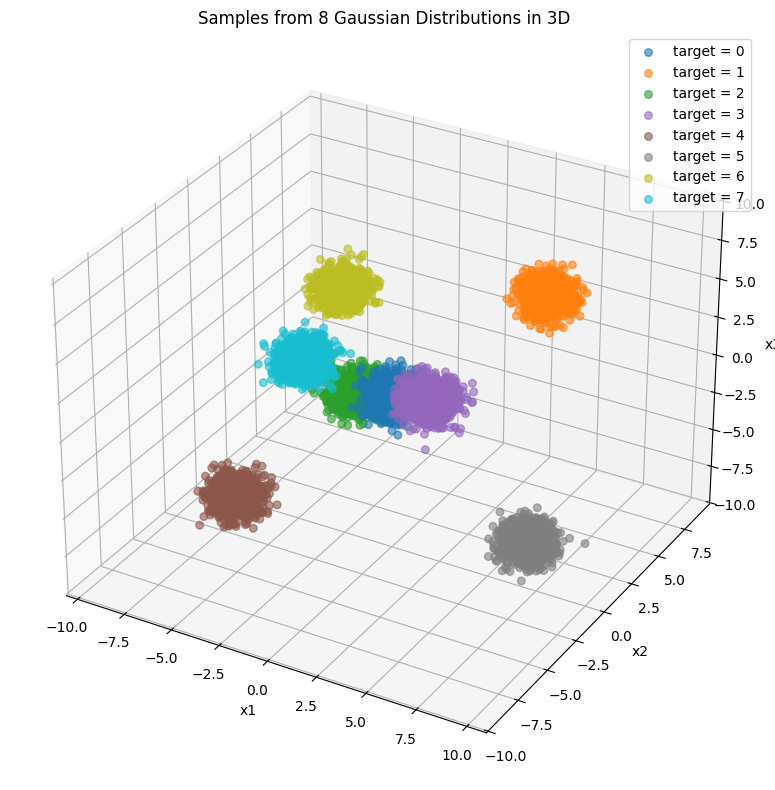

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# データ生成
df = _load_3d_8gaussian_clusters_df()

# 可視化
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.get_cmap("tab10", 8)  # 8色取得

for label in sorted(df["target"].unique()):
    subset = df[df["target"] == label]
    ax.scatter(subset["x1"], subset["x2"], subset["x3"],
               label=f"target = {label}",
               color=colors(label), alpha=0.6, s=30)

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")
ax.set_title("Samples from 8 Gaussian Distributions in 3D")
ax.legend()
plt.tight_layout()
plt.show()
df.to_csv("3D_8_Gaussian_Clusters.csv", index=False)

In [22]:
pip install umap-learn

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 14.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   --------- ------------------------------ 7.3/30.3 MB 34.9 MB/s eta 0:00:01
   -------------------- ------------------- 15.5/30.3 MB 37.4 MB/s eta 0:00:01
   -------------------------------- ------- 24.6/30.3 MB 39.0 MB/s eta 0:00:01
   ---------------------------------------  30.1/30.3 MB 39.0 MB/s eta 0:00:01
   ---------------------------------------- 30.3/30.3 MB 29.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\sueya\AppData\Local\pypoetry\Cache\virtualenvs\datacollaborationanalysis-jS9KJoip-py3.11\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\sueya\AppData\Local\pypoetry\Cache\virtualenvs\datacollaborationanalysis-jS9KJoip-py3.11\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


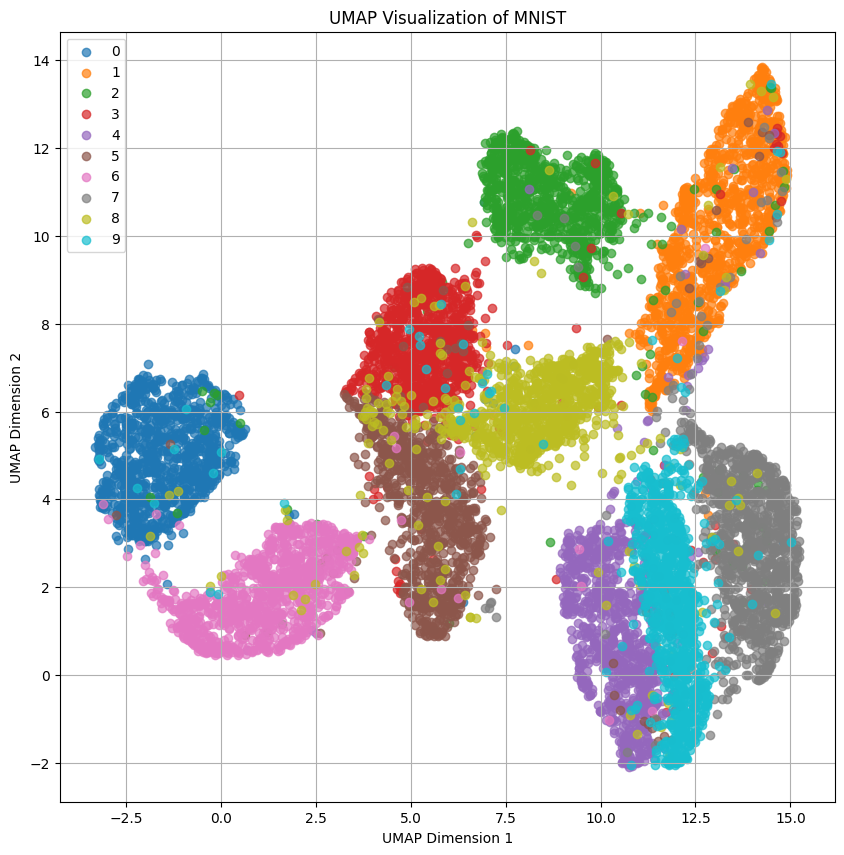

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.datasets import fetch_openml

# MNIST データセットのダウンロード
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data
y = mnist.target.astype(int)

# 計算量削減のため、ランダムに 10000 件を抽出
np.random.seed(42)
indices = np.random.choice(X.shape[0], 10000, replace=False)
X_subset = X[indices]
y_subset = y[indices]

# UMAP モデルの作成と適用
umap_model = umap.UMAP(n_components=2, n_neighbors=10, min_dist=0.3, random_state=42)
X_umap = umap_model.fit_transform(X_subset)

# プロットの設定
plt.figure(figsize=(10, 10))

# 各クラス（0〜9）のプロット
for i in range(10):
    indices = y_subset == i
    plt.scatter(X_umap[indices, 0], X_umap[indices, 1], label=str(i), alpha=0.7)

# プロットの装飾
plt.legend()
plt.title("UMAP Visualization of MNIST")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid(True)
plt.savefig('UMAP.png')
plt.show()

c:\Users\sueya\AppData\Local\pypoetry\Cache\virtualenvs\datacollaborationanalysis-jS9KJoip-py3.11\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


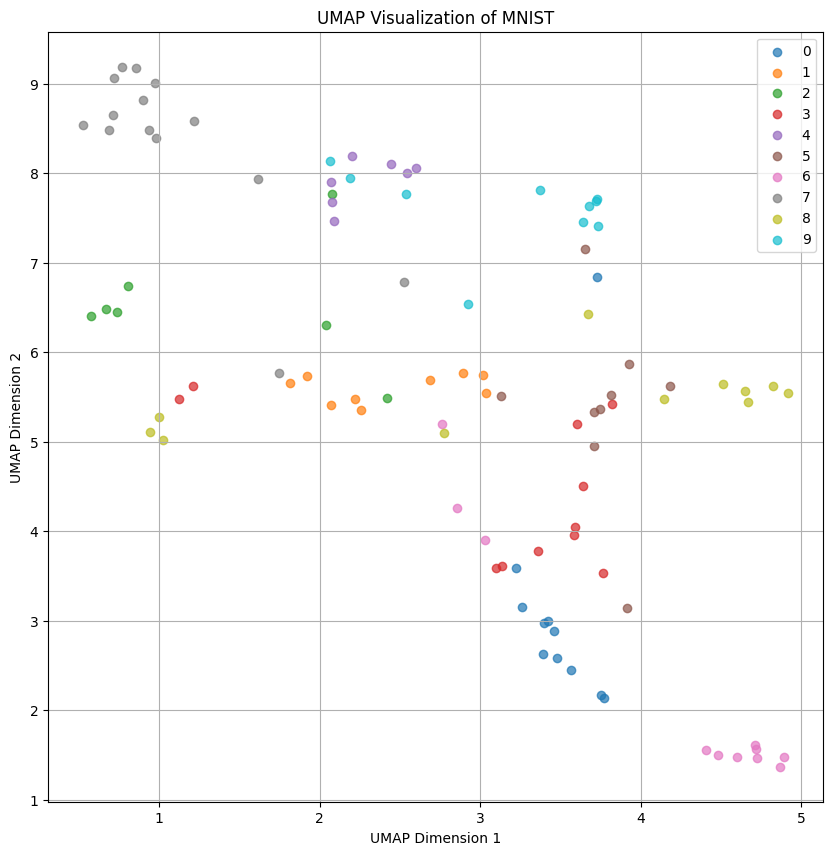

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.datasets import fetch_openml

# MNIST データセットのダウンロード
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data
y = mnist.target.astype(int)

# 計算量削減のため、ランダムに 10000 件を抽出
np.random.seed(42)
indices = np.random.choice(X.shape[0], 100, replace=False)
X_subset = X[indices]
y_subset = y[indices]

# UMAP モデルの作成と適用
umap_model = umap.UMAP(n_components=3, n_neighbors=5, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X_subset)

# プロットの設定
plt.figure(figsize=(10, 10))

# 各クラス（0〜9）のプロット
for i in range(10):
    indices = y_subset == i
    plt.scatter(X_umap[indices, 0], X_umap[indices, 1], label=str(i), alpha=0.7)

# プロットの装飾
plt.legend()
plt.title("UMAP Visualization of MNIST")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid(True)
plt.savefig('UMAP.png')
plt.show()

c:\Users\sueya\AppData\Local\pypoetry\Cache\virtualenvs\datacollaborationanalysis-jS9KJoip-py3.11\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\sueya\AppData\Local\pypoetry\Cache\virtualenvs\datacollaborationanalysis-jS9KJoip-py3.11\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


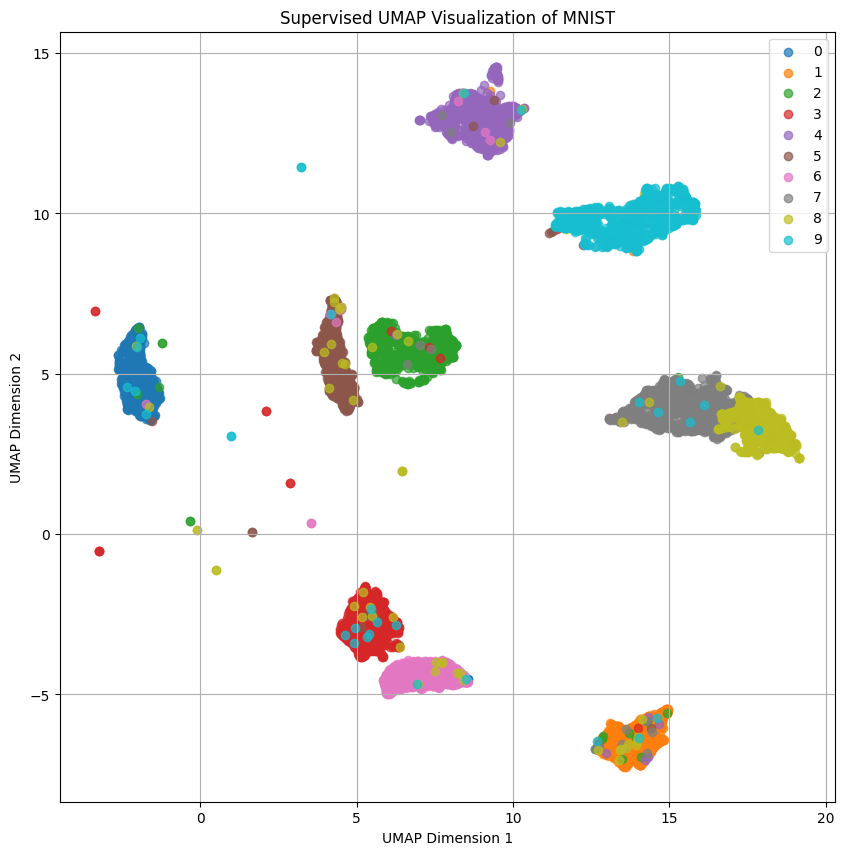

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.datasets import fetch_openml

# MNIST データセットのダウンロード
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data
y = mnist.target.astype(int)

# 計算量削減のため、ランダムに 10000 件を抽出
np.random.seed(42)
indices = np.random.choice(X.shape[0], 10000, replace=False)
X_subset = X[indices]
y_subset = y[indices]

# 教師あり UMAP モデルの作成と適用
umap_model = umap.UMAP(
    n_components=3,
    n_neighbors=5,
    min_dist=0.1,
    target_metric='categorical',  # ラベルをカテゴリとして扱う
    target_weight=0.7,            # ラベルの効きを調整 (0=無視, 1=ラベル重視)
    random_state=42
)
X_umap = umap_model.fit_transform(X_subset, y_subset)

# プロットの設定
plt.figure(figsize=(10, 10))

# 各クラス（0〜9）のプロット
for i in range(10):
    idx = y_subset == i
    plt.scatter(X_umap[idx, 0], X_umap[idx, 1], label=str(i), alpha=0.7)

# プロットの装飾
plt.legend()
plt.title("Supervised UMAP Visualization of MNIST")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid(True)
plt.savefig('UMAP_supervised.png')
plt.show()


c:\Users\sueya\AppData\Local\pypoetry\Cache\virtualenvs\datacollaborationanalysis-jS9KJoip-py3.11\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


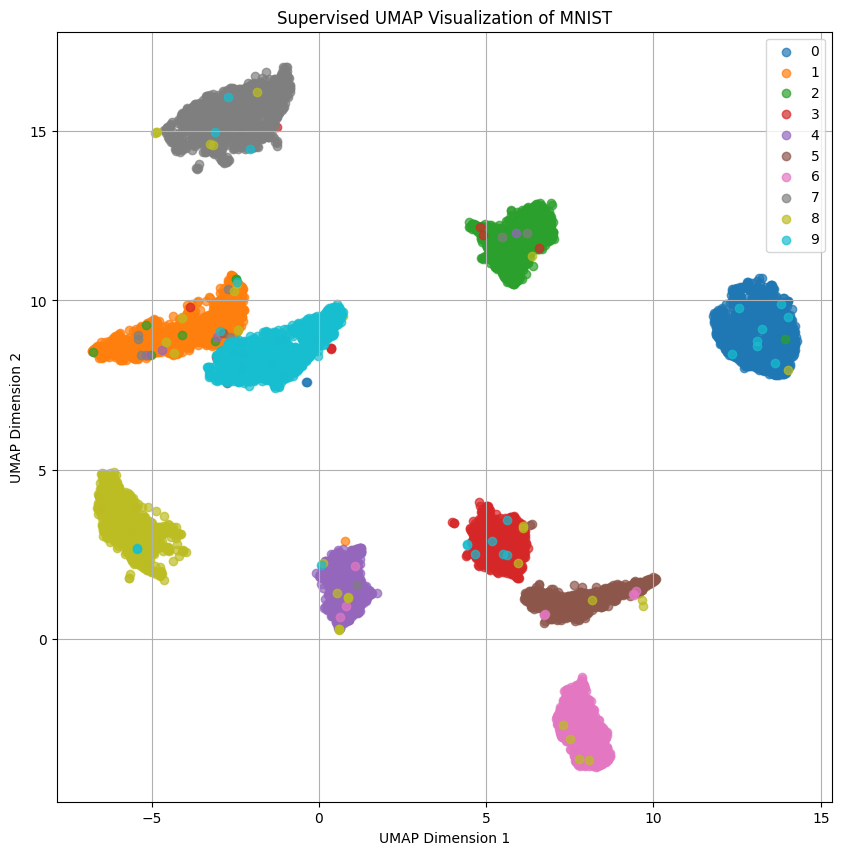

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.datasets import fetch_openml

# MNIST データセットのダウンロード
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data
y = mnist.target.astype(int)

# 計算量削減のため、ランダムに 10000 件を抽出
np.random.seed(42)
indices = np.random.choice(X.shape[0], 10000, replace=False)
X_subset = X[indices]
y_subset = y[indices]

# 教師あり UMAP モデルの作成と適用
umap_model = umap.UMAP(
    n_components=3,
    n_neighbors=10,
    min_dist=0.2,
    target_metric='categorical',  # ラベルをカテゴリとして扱う
    target_weight=0.2,            # ラベルの効きを調整 (0=無視, 1=ラベル重視)
    random_state=42
)
X_umap = umap_model.fit_transform(X_subset, y_subset)

# プロットの設定
plt.figure(figsize=(10, 10))

# 各クラス（0〜9）のプロット
for i in range(10):
    idx = y_subset == i
    plt.scatter(X_umap[idx, 0], X_umap[idx, 1], label=str(i), alpha=0.7)

# プロットの装飾
plt.legend()
plt.title("Supervised UMAP Visualization of MNIST")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid(True)
plt.savefig('UMAP_supervised.png')
plt.show()


X_dummy: (200, 784) -> Z: (200, 3)


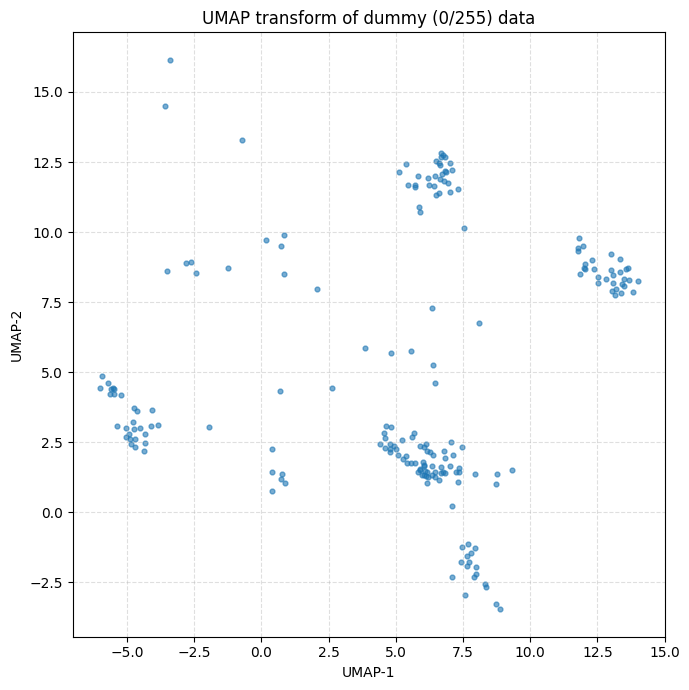

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# 学習済みモデルの存在チェック
try:
    n_features = int(getattr(umap_model, "n_features_in_", 784))
except NameError as e:
    raise RuntimeError("umap_model が定義されていません。先に fit または fit_transform を実行してください。") from e

# 0/255 のみのダミーMNIST風データを作成
rng = np.random.default_rng(42)
n_samples = 200

# ランダムな二値(0/255)ベクトル
X_dummy = (rng.integers(0, 2, size=(n_samples, n_features), dtype=np.int32) * 255).astype(np.float32)

# いくつかのパターンも追加（全黒・全白）
X_dummy[0, :] = 0
X_dummy[1, :] = 255

# 変換
Z = umap_model.transform(X_dummy)
print("X_dummy:", X_dummy.shape, "-> Z:", Z.shape)

# 2次元散布（n_components>=2 を想定して先頭2軸プロット）
plt.figure(figsize=(7,7))
plt.scatter(Z[:,0], Z[:,1], s=12, alpha=0.6, c="tab:blue")
plt.title("UMAP transform of dummy (0/255) data")
plt.xlabel("UMAP-1"); plt.ylabel("UMAP-2")
plt.grid(True, ls="--", alpha=0.4)
plt.tight_layout()
plt.show()

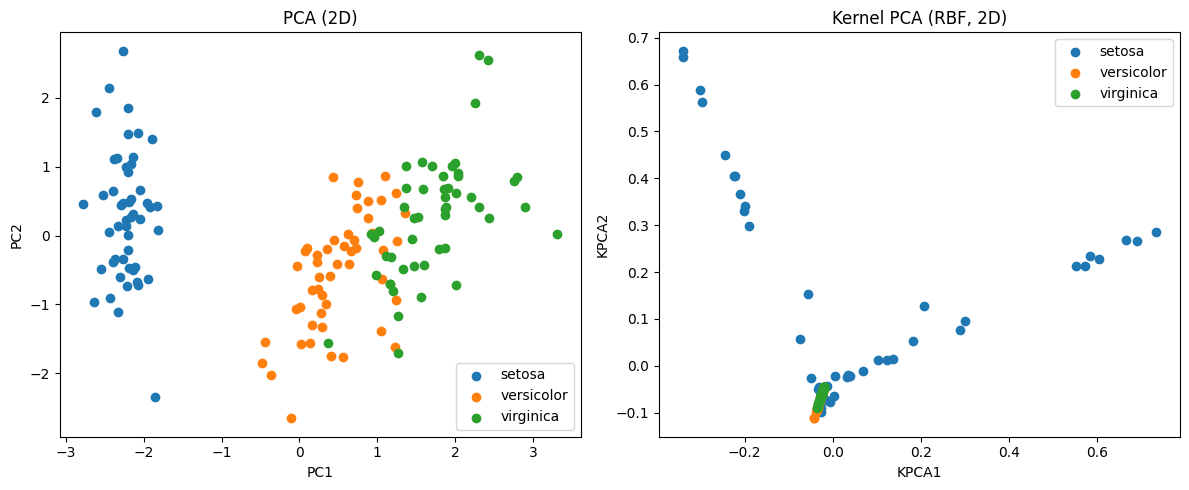

In [25]:
# 再実行（環境リセット後なので import から書き直す）

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA

# データ読み込み
iris = load_iris()
X = iris.data
y = iris.target
labels = iris.target_names

# 標準化
X_std = StandardScaler().fit_transform(X)

# PCA (2D)
pca = PCA(n_components=2, random_state=42)
Xp = pca.fit_transform(X_std)

# KPCA (RBF, 2D)
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=15, random_state=42)
Xk = kpca.fit_transform(X_std)

# 可視化
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# PCAプロット
for i, label in enumerate(labels):
    axes[0].scatter(Xp[y==i, 0], Xp[y==i, 1], label=label)
axes[0].set_title("PCA (2D)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].legend()

# KPCAプロット
for i, label in enumerate(labels):
    axes[1].scatter(Xk[y==i, 0], Xk[y==i, 1], label=label)
axes[1].set_title("Kernel PCA (RBF, 2D)")
axes[1].set_xlabel("KPCA1")
axes[1].set_ylabel("KPCA2")
axes[1].legend()

plt.tight_layout()
plt.show()


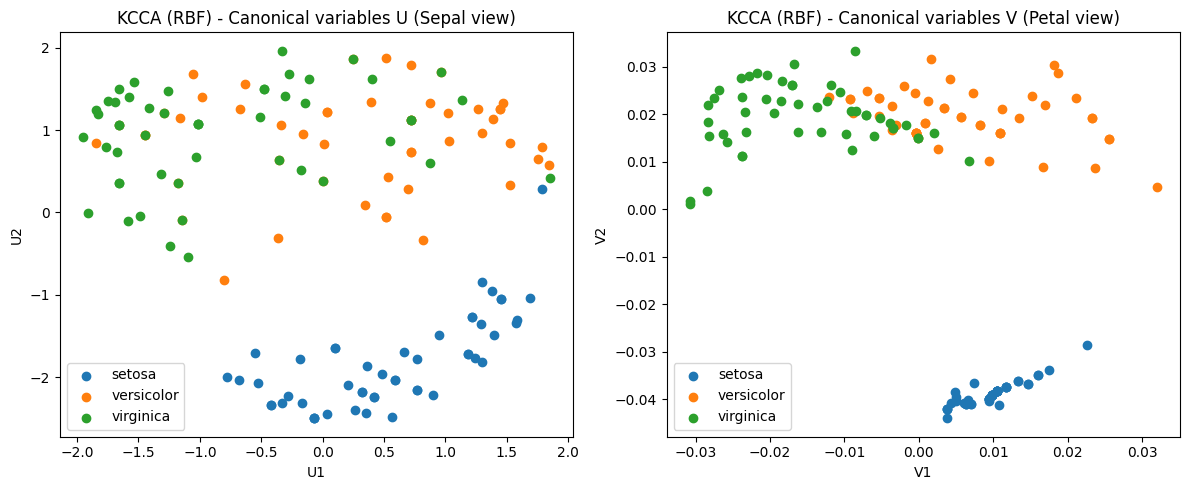

In [28]:
# Kernel CCA (KCCA) demo on Iris:
# - 2つのビューを作成: View1=Sepal系特徴(長さ・幅), View2=Petal系特徴(長さ・幅)
# - RBFカーネルでKCCAを解き、上位2成分の「カノニカル変数」を可視化
# 参考実装: 一般化固有値問題 (Bach & Jordan 2002 の定式化に基づく簡易版)
# 正則化付き: (Kx + rI)^-1 Ky (Ky + rI)^-1 Kx の固有分解
# 可視化は U = Kx @ alpha（View1側のカノニカル変数）を2次元散布図で色付け
# （検証用として V = Ky @ beta も並べて描画）

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_kernels

# --- データ読み込み＆2ビュー作成 ---
iris = load_iris()
X = iris.data
y = iris.target
labels = iris.target_names

# View1: sepal length/width, View2: petal length/width
X1 = X[:, :2]
X2 = X[:, 2:]

# スケーリング（各ビューごとにZ標準化）
X1 = StandardScaler().fit_transform(X1)
X2 = StandardScaler().fit_transform(X2)

# --- RBFカーネル行列 ---
def median_heuristic_gamma(X):
    # 中央値距離から gamma ≈ 1/(2*med^2)
    from sklearn.metrics import pairwise_distances
    D = pairwise_distances(X)
    med = np.median(D[np.triu_indices_from(D, k=1)])
    return 1.0 / (2.0 * (med ** 2) + 1e-12)

gamma1 = median_heuristic_gamma(X1)
gamma2 = median_heuristic_gamma(X2)

Kx = pairwise_kernels(X1, X1, metric="rbf", gamma=gamma1)
Ky = pairwise_kernels(X2, X2, metric="rbf", gamma=gamma2)

n = Kx.shape[0]
I = np.eye(n)
H = I - np.ones((n, n))/n  # センタリング

# 中心化
Kx_c = H @ Kx @ H
Ky_c = H @ Ky @ H

# --- 正則化付きKCCA ---
reg = 1e-3
# 対称化（数値安定）
Kx_c = (Kx_c + Kx_c.T) / 2.0
Ky_c = (Ky_c + Ky_c.T) / 2.0

# 逆行列は数値的に不安定なので、解き方を工夫:
# (Kx + rI)^{-1} Ky (Ky + rI)^{-1} Kx の固有値問題を
# 連立方程式として解く（np.linalg.solveを用いる）
from numpy.linalg import eigh, solve

Kx_reg = Kx_c + reg * I
Ky_reg = Ky_c + reg * I

# 行列 M = (Kx_reg^-1 @ Ky_c @ Ky_reg^-1 @ Kx_c) は対称でない場合があるため、
# 対称化近似 M_sym = Kx_reg^-1/2 Ky_c Ky_reg^-1 Ky_c Kx_reg^-1/2 を使うと安定
# ただしここでは簡易に A = solve(Kx_reg, Ky_c) ; B = solve(Ky_reg, Kx_c) として M = A @ B
A = solve(Kx_reg, Ky_c)
B = solve(Ky_reg, Kx_c)
M = A @ B

# 対称化（経験的に安定化）
M = (M + M.T) / 2.0

# 固有分解
eigvals, eigvecs = eigh(M)
# 上位成分を大きい順に
order = np.argsort(eigvals)[::-1]
eigvals = eigvals[order]
alphas = eigvecs[:, order]  # View1側の係数

# 2次元のカノニカル変数（View1側）
U = Kx_c @ alphas[:, :2]

# View2側の係数 beta を計算（beta = (Ky_reg)^-1 Kx_c alpha / sqrt(rho)）
# rho = sqrt(eigval) （正の固有値のみ想定）
rho = np.sqrt(np.maximum(eigvals[:2], 0))
betas = np.column_stack([solve(Ky_reg, Kx_c @ alphas[:, i]) / (rho[i] + 1e-12) for i in range(2)])
V = Ky_c @ betas

# --- 可視化 ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# U (View1: sepal側)
for i, lab in enumerate(labels):
    axes[0].scatter(U[y==i, 0], U[y==i, 1], label=lab)
axes[0].set_title("KCCA (RBF) - Canonical variables U (Sepal view)")
axes[0].set_xlabel("U1")
axes[0].set_ylabel("U2")
axes[0].legend()

# V (View2: petal側)
for i, lab in enumerate(labels):
    axes[1].scatter(V[y==i, 0], V[y==i, 1], label=lab)
axes[1].set_title("KCCA (RBF) - Canonical variables V (Petal view)")
axes[1].set_xlabel("V1")
axes[1].set_ylabel("V2")
axes[1].legend()

plt.tight_layout()
plt.show()


255

In [10]:
from sklearn.datasets import fetch_olivetti_faces, fetch_openml, load_digits, make_moons, make_swiss_roll
import pandas as pd
def _load_digits_df() -> pd.DataFrame:
    """8×8 手書き数字 (n=1 797) を DataFrame 化。"""
    bunch = load_digits(as_frame=True)
    # `bunch.frame` には data と target が入り済み
    df = bunch.frame.copy()
    df = df.rename(columns={"target": "target"})
    # 'org' 列が存在する場合のみ削除
    if "org" in df.columns:
        df = df.drop(columns=["org"])
    
        # NaN 値を確認し、処理する
    if df.isnull().any().any():
        # NaN を 0 で埋める場合
        df = df.fillna(0)
        # または、NaN を削除する場合
        # df = df.dropna()
    df = df[:200]
    return df

c:\Users\sueya\AppData\Local\pypoetry\Cache\virtualenvs\datacollaborationanalysis-jS9KJoip-py3.11\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\sueya\AppData\Local\pypoetry\Cache\virtualenvs\datacollaborationanalysis-jS9KJoip-py3.11\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


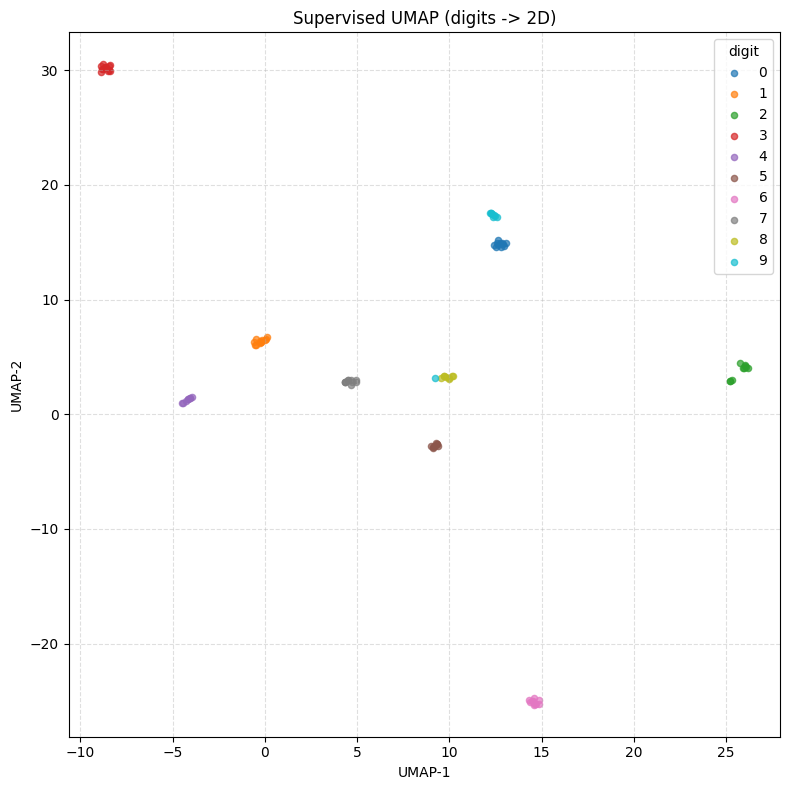

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap

# データ読込
df = _load_digits_df()
X = df.drop(columns=["target"]).values
y = df["target"].astype(int).values

# 教師あり UMAP (2次元)
umap_model = umap.UMAP(
    n_components=2,
    n_neighbors=15,
    min_dist=0.1,
    target_metric="categorical",
    target_weight=0.7,
    random_state=42,
)
X_umap = umap_model.fit_transform(X, y)

# プロット
plt.figure(figsize=(8, 8))
classes = np.unique(y)
for c in classes:
    idx = (y == c)
    plt.scatter(X_umap[idx, 0], X_umap[idx, 1], s=20, alpha=0.7, label=str(c))

plt.legend(title="digit")
plt.title("Supervised UMAP (digits -> 2D)")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True, ls="--", alpha=0.4)
plt.tight_layout()
plt.savefig("digits_umap_supervised_2d.png", dpi=150)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap

# データ読込（既存の関数を利用）
df = _load_digits_df()
X = df.drop(columns=["target"]).values
y = df["target"].astype(int).values

# クラス 0～4 のみ抽出
mask = (y >= 1) & (y <= 4)
X5 = X[mask]
y5 = y[mask]
classes = np.unique(y5)

# 1) 教師なし UMAP (2次元)
umap_unsup = umap.UMAP(
    n_components=2,
    n_neighbors=15,
    min_dist=0.1,
    random_state=42,
)
X_umap_unsup = umap_unsup.fit_transform(X5)

plt.figure(figsize=(8, 8))
for c in classes:
    idx = (y5 == c)
    plt.scatter(X_umap_unsup[idx, 0], X_umap_unsup[idx, 1], s=20, alpha=0.7, label=str(c))
plt.legend(title="digit (0-4)")
plt.title("UMAP (unsupervised) digits 0-4 -> 2D")
plt.xlabel("UMAP-1"); plt.ylabel("UMAP-2")
plt.grid(True, ls="--", alpha=0.4)
plt.tight_layout()
plt.savefig("digits_umap_unsupervised_0to4_2d.png", dpi=150)
plt.show()

# 2) 教師あり UMAP (2次元)
umap_sup = umap.UMAP(
    n_components=2,
    n_neighbors=15,
    min_dist=0.1,
    target_metric="categorical",
    target_weight=0.7,
    random_state=42,
)
X_umap_sup = umap_sup.fit_transform(X5, y5)

plt.figure(figsize=(8, 8))
for c in classes:
    idx = (y5 == c)
    plt.scatter(X_umap_sup[idx, 0], X_umap_sup[idx, 1], s=20, alpha=0.7, label=str(c))
plt.legend(title="digit (0-4)")
plt.title("Supervised UMAP (digits 0-4 -> 2D)")
plt.xlabel("UMAP-1"); plt.ylabel("UMAP-2")
plt.grid(True, ls="--", alpha=0.4)
plt.tight_layout()
plt.savefig("digits_umap_supervised_0to4_2d.png", dpi=150)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'input/qsar+biodegradation/biodeg.csv'

In [29]:
X_umap =X_tr_emb

# プロットの設定
plt.figure(figsize=(10, 10))

# 各クラス（0〜9）のプロット
for i in range(10):
    indices = y_subset == i
    plt.scatter(X_umap[indices, 0], X_umap[indices, 1], label=str(i), alpha=0.7)

# プロットの装飾
plt.legend()
plt.title("UMAP Visualization of MNIST")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid(True)
plt.savefig('UMAP.png')
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 7000 but corresponding boolean dimension is 10000

<Figure size 1000x1000 with 0 Axes>

In [3]:
!pip install openpyxl


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from openpyxl import Workbook, load_workbook
from openpyxl.styles import Alignment, PatternFill

# ---------- Rebuild the wide table (same as before) ----------
input_files = [
    (r"C:\Users\sueya\Git-Repositories\takano_labo\dca_yanagi\output\exp004\result_adult.csv", "adult"),
    (r"C:\Users\sueya\Git-Repositories\takano_labo\dca_yanagi\output\exp004\result_breast_cancer.csv", "cancer"),
    (r"C:\Users\sueya\Git-Repositories\takano_labo\dca_yanagi\output\exp004\result_digits.csv", "digits"),
    (r"C:\Users\sueya\Git-Repositories\takano_labo\dca_yanagi\output\exp004\result_housing.csv", "housing"),
]

base_gtypes = ["centralize", "individual", "fl", "Imakura", "ODC", "GEP"]
nlin_gtypes = ["nonlinear", "nonlinear_linear"]
target_g = base_gtypes + nlin_gtypes

gamma_order = ["X_tuning", "auto"]
lambda_order = ["1e-08", "0.1", "1.0"]

dfs = []
for path, dsname in input_files:
    p = Path(path)
    if p.exists():
        df = pd.read_csv(p)
        df["dataset"] = dsname
        dfs.append(df)

if not dfs:
    raise FileNotFoundError("入力CSVが見つかりません。")

df_all = pd.concat(dfs, axis=0, ignore_index=True)
df_all = df_all[df_all["G_type"].isin(target_g)].copy()
df_all["metrics_mean"] = pd.to_numeric(df_all["metrics_mean"], errors="coerce")

if "gamma_type" not in df_all.columns:
    df_all["gamma_type"] = ""
if "nl_lambda" not in df_all.columns:
    df_all["nl_lambda"] = ""

def nl_to_str(x):
    try:
        s = str(x)
        v = float(s)
        if np.isclose(v, 1.0): return "1.0"
        if np.isclose(v, 0.1): return "0.1"
        if np.isclose(v, 1e-08): return "1e-08"
        return s
    except Exception:
        return str(x)

df_all["gamma_type"] = df_all["gamma_type"].astype(str)
df_all["nl_lambda_str"] = df_all["nl_lambda"].apply(nl_to_str)

# Build column MultiIndex
cols_l0 = ["dataset", "model", "F_type"]
cols_l1 = ["", "", ""]
cols_l2 = ["", "", ""]
for g in base_gtypes:
    cols_l0 += [g]; cols_l1 += [""]; cols_l2 += [""]
for g in nlin_gtypes:
    for gam in gamma_order:
        for lam in lambda_order:
            cols_l0 += [g]; cols_l1 += [gam]; cols_l2 += [lam]

# Collect rows
rows = []
for (ds, model, ftype), grp in df_all.groupby(["dataset","model","F_type"], sort=True):
    row = {}
    row[("dataset","","")] = ds
    row[("model","","")] = model
    row[("F_type","","")] = ftype
    # baselines (max = representative; no averaging)
    for g in base_gtypes:
        vals = grp.loc[grp["G_type"]==g, "metrics_mean"].dropna()
        row[(g,"","")] = round(vals.max(), 3) if not vals.empty else None
    # nonlinear variants
    for g in nlin_gtypes:
        sub = grp[grp["G_type"]==g]
        for gam in gamma_order:
            for lam in lambda_order:
                mask = (sub["gamma_type"]==gam) & (sub["nl_lambda_str"]==lam)
                vals = sub.loc[mask, "metrics_mean"].dropna()
                row[(g,gam,lam)] = round(vals.max(), 3) if not vals.empty else None
    rows.append(row)

wide = pd.DataFrame(rows, columns=pd.MultiIndex.from_arrays([cols_l0, cols_l1, cols_l2]))

# ---------- Write Excel with 3-row header and row-wise coloring ----------
out_xlsx = "triheader_nonlinear_6cols_colored.xlsx"
wb = Workbook()
ws = wb.active
ws.title = "table"

# Header rows
ws.append(list(wide.columns.get_level_values(0)))
ws.append([str(x) if x is not None else "" for x in wide.columns.get_level_values(1)])
ws.append([str(x) if x is not None else "" for x in wide.columns.get_level_values(2)])

# Data rows (start at row 4)
for i in range(len(wide)):
    ws.append([wide.iloc[i, j] for j in range(wide.shape[1])])

# Number format (0.000)
ncols = wide.shape[1]
for r in range(4, 4+len(wide)):
    for c in range(1, ncols+1):
        cell = ws.cell(row=r, column=c)
        if isinstance(cell.value, (int, float)) and cell.value is not None:
            cell.number_format = "0.000"

# Center headers & freeze pane
for r in [1,2,3]:
    for c in range(1, ncols+1):
        ws.cell(row=r, column=c).alignment = Alignment(horizontal="center", vertical="center")
ws.freeze_panes = "A4"

# Row-wise coloring across specified columns only
# Targets: Imakura, ODC, GEP, and all columns whose first header row is 'nonlinear' or 'nonlinear_linear'
target_names = {"Imakura", "ODC", "GEP", "nonlinear", "nonlinear_linear"}

# Map column indices to whether it's included in ranking
include_cols = []
for c in range(1, ncols+1):
    top_name = ws.cell(row=1, column=c).value
    if top_name in target_names:
        include_cols.append(c)

fill_top1 = PatternFill(start_color="FFCCCC", end_color="FFCCCC", fill_type="solid")  # red
fill_top2 = PatternFill(start_color="CCE0FF", end_color="CCE0FF", fill_type="solid")  # blue
fill_top3 = PatternFill(start_color="CCFFCC", end_color="CCFFCC", fill_type="solid")  # green

for r in range(4, 4+len(wide)):
    # データセット名を取得
    dataset_name = ws.cell(row=r, column=1).value

    vals = []
    for c in include_cols:
        cell = ws.cell(row=r, column=c)
        try:
            v = float(cell.value) if cell.value is not None and cell.value != "" else None
        except (TypeError, ValueError):
            v = None
        # 空白セルを除外
        if v is not None:
            vals.append((c, v))

    # Unique top-3
    if dataset_name == "housing":
        # "housing" の場合は値が小さい順に色付け
        uniq_vals = sorted({v for (_, v) in vals})
    else:
        # 他のデータセットはデフォルトの処理
        uniq_vals = sorted({v for (_, v) in vals}, reverse=True)

    top_vals = uniq_vals[:3]

    for c, v in vals:
        if len(top_vals) > 0 and np.isclose(v, top_vals[0]):
            ws.cell(row=r, column=c).fill = fill_top1
        elif len(top_vals) > 1 and np.isclose(v, top_vals[1]):
            ws.cell(row=r, column=c).fill = fill_top2
        elif len(top_vals) > 2 and np.isclose(v, top_vals[2]):
            ws.cell(row=r, column=c).fill = fill_top3

wb.save(out_xlsx)
print(f"[Download Excel] {out_xlsx}")

[Download Excel] triheader_nonlinear_6cols_colored.xlsx


In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import argparse
from pathlib import Path

import numpy as np
import pandas as pd
from openpyxl import Workbook
from openpyxl.styles import Alignment, PatternFill


DESIRED_ORDER = ["centralize", "individual", "fl", "Imakura", "ODC", "GEP", "mlp_objective", "nonlinear"]
EXCLUDE_FOR_RANK = {"centralize", "fl", "individual"}  # 色付けから除外
TOP1_FILL = PatternFill(start_color="FFCCCC", end_color="FFCCCC", fill_type="solid")  # 赤
TOP2_FILL = PatternFill(start_color="CCE0FF", end_color="CCE0FF", fill_type="solid")  # 青
TOP3_FILL = PatternFill(start_color="CCFFCC", end_color="CCFFCC", fill_type="solid")  # 緑


def main(input_path: str, output_path: str):
    p = Path(input_path)
    if not p.exists():
        raise FileNotFoundError(f"Input not found: {input_path}")

    df = pd.read_csv(p)

    # 列名の標準化
    metric_col = "metrics_mean" if "metrics_mean" in df.columns else ("提案手法" if "提案手法" in df.columns else None)
    if metric_col is None:
        raise ValueError("metrics_mean も 提案手法 も見つかりません。")

    orth_col = "orth_ver" if "orth_ver" in df.columns else ("orth" if "orth" in df.columns else None)
    if orth_col is None:
        raise ValueError("orth / orth_ver のいずれも見つかりません。")

    # True_F_type が無ければ F_type を使う
    if "True_F_type" in df.columns:
        tf_col = "True_F_type"
    elif "F_type" in df.columns:
        tf_col = "F_type"
        df = df.rename(columns={"F_type": "True_F_type"})
        tf_col = "True_F_type"
    else:
        raise ValueError("F_type / True_F_type が見つかりません。")

    # 型整形
    df[metric_col] = pd.to_numeric(df[metric_col], errors="coerce")
    df["semi_integ"] = df["semi_integ"].astype(str)
    df[orth_col] = df[orth_col].astype(str)
    df["G_type"] = df["G_type"].astype(str)

    # G_combined
    df["G_combined"] = df["G_type"] + df["semi_integ"] + df[orth_col]

    # 集計（平均）
    agg = (
        df.groupby(["dataset", tf_col, "G_type", "semi_integ", orth_col, "G_combined"], dropna=False)[metric_col]
          .mean()
          .reset_index()
          .rename(columns={metric_col: "提案手法_mean"})
    )

    # 列（G_combined 群）を所定順に並べる
    gcols = (
        agg[["G_type", "semi_integ", orth_col, "G_combined"]]
        .drop_duplicates()
        .reset_index(drop=True)
    )

    # 並び：G_type を DESIRED_ORDER に従って、その中は semi_integ, orth の昇順（False→True想定）
    def order_key(row):
        gtype = row["G_type"]
        g_idx = DESIRED_ORDER.index(gtype) if gtype in DESIRED_ORDER else 999
        # False/True を安定的に並べるため文字列を想定（"False", "True"）
        si = row["semi_integ"]
        ov = row[orth_col]
        return (g_idx, gtype, si, ov)

    gcols = gcols.sort_values(by=["G_type", "semi_integ", orth_col], key=lambda s: s.astype(str))
    gcols = gcols.sort_values(by=["G_type"], key=lambda s: s.map(
        lambda x: DESIRED_ORDER.index(x) if x in DESIRED_ORDER else 999
    ))

    # ヘッダ3段
    header_l0 = ["dataset", "True_F_type"] + gcols["G_type"].astype(str).tolist()
    header_l1 = ["", ""] + gcols["semi_integ"].astype(str).tolist()
    header_l2 = ["", ""] + gcols[orth_col].astype(str).tolist()

    # 値ルックアップ
    mean_map = agg.set_index(["dataset", "True_F_type", "G_combined"])["提案手法_mean"].to_dict()

    # 行（dataset × True_F_type）
    rows = []
    for (ds, tf), grp in agg.groupby(["dataset", "True_F_type"], sort=True):
        row_vals = [ds, tf]
        for _, col in gcols.iterrows():
            key = (ds, tf, col["G_combined"])
            v = mean_map.get(key)
            row_vals.append(None if pd.isna(v) else round(float(v), 3))
        rows.append(row_vals)

    # Excel 書き出し
    wb = Workbook()
    ws = wb.active
    ws.title = "table"

    ws.append(header_l0)
    ws.append(header_l1)
    ws.append(header_l2)
    for r in rows:
        ws.append(r)

    nrows = len(rows)
    ncols = len(header_l0)

    # 数値フォーマット
    for r in range(4, 4 + nrows):
        for c in range(1, ncols + 1):
            cell = ws.cell(row=r, column=c)
            if isinstance(cell.value, (int, float)) and cell.value is not None:
                cell.number_format = "0.000"

    # ヘッダ整形 & 固定
    for rr in (1, 2, 3):
        for cc in range(1, ncols + 1):
            ws.cell(row=rr, column=cc).alignment = Alignment(horizontal="center", vertical="center")
    ws.freeze_panes = "A4"

    # 色付け（行ごと、centralize/fl/individual は除外）
    include_cols = []
    for c in range(3, ncols + 1):
        gtype_name = ws.cell(row=1, column=c).value
        if gtype_name not in EXCLUDE_FOR_RANK:
            include_cols.append(c)

    for r in range(4, 4 + nrows):
        dataset_name = ws.cell(row=r, column=1).value
        vals = []
        for c in include_cols:
            cell = ws.cell(row=r, column=c)
            try:
                v = float(cell.value) if cell.value not in (None, "") else None
            except (TypeError, ValueError):
                v = None
            if v is not None:
                vals.append((c, v))

        # 上位3つ（重複値はまとめる）: housingだけ小さい方が良い
        if dataset_name == "housing":
            uniq_vals = sorted({v for (_, v) in vals})
        else:
            uniq_vals = sorted({v for (_, v) in vals}, reverse=True)

        top_vals = uniq_vals[:3]

        for c, v in vals:
            if len(top_vals) > 0 and np.isclose(v, top_vals[0]):
                ws.cell(row=r, column=c).fill = TOP1_FILL
            elif len(top_vals) > 1 and np.isclose(v, top_vals[1]):
                ws.cell(row=r, column=c).fill = TOP2_FILL
            elif len(top_vals) > 2 and np.isclose(v, top_vals[2]):
                ws.cell(row=r, column=c).fill = TOP3_FILL

    wb.save(output_path)
    print(f"Saved: {output_path}")

# Notebook から直接実行する場合
input_path = r"C:\Users\sueya\Git-Repositories\takano_labo\dca_yanagi\output\exp005\result_0830.csv"        # 入力ファイル名
output_path = "triheader_output_0830.xlsx" # 出力ファイル名

main(input_path, output_path)


Saved: triheader_output_0830.xlsx


In [7]:
# Create an Excel file with one sheet per dataset, showing lw_alpha vs 提案手法 mean
out_xlsx = "提案手法_mean_by_dataset_lwalpha.csv"
# CSV 読み込み
df = pd.read_csv(out_xlsx)

# 数値化
df["提案手法"] = pd.to_numeric(df["提案手法"], errors="coerce")

# dataset × lw_alpha ごとに平均
agg_mean = (
    df.groupby(["dataset", "lw_alpha"])["提案手法"]
      .mean()
      .round(4)  # 小数第4位まで
      .reset_index()
)


# ピボットテーブル化
pivot = (
    df.pivot_table(
        index="dataset",
        columns="lw_alpha",
        values="提案手法",
        aggfunc="mean"
    )
    .round(4)  # 小数第4位まで
)

pivot

lw_alpha,0.0,0.1,0.5,1.0,5.0
dataset,,,,,
adult,0.7862,0.7685,0.7501,0.7508,0.7556
breast_cancer,0.8942,0.8991,0.9007,0.8962,0.8922
digits,0.9830,0.9819,0.9816,0.9803,0.9716
mice,0.7933,0.7529,0.7369,0.7147,0.7040
qsar,0.7604,0.7607,0.7596,0.7589,0.7538
statlog,0.6547,0.6109,0.5851,0.5887,0.6194


In [2]:
import pandas as pd
from openpyxl import Workbook
from openpyxl.styles import PatternFill, Alignment

# 読み込み
merged = pd.read_csv("merged_vertical_final.csv")

# ピボットして dataset × model ごとに行、lw_alpha ごとに列
pivot = merged.pivot_table(
    index=["dataset", "model"],
    columns="lw_alpha",
    values="metrics_mean",
    aggfunc="mean"
).reset_index()

# 列順: dataset, model, lw_alpha昇順
cols = ["dataset", "model"] + sorted([c for c in pivot.columns if c not in ["dataset", "model"]])
pivot = pivot[cols].round(4)   # 小数第4位まで

# Excel 出力
out_xlsx = "metrics_mean_by_lwalpha.xlsx"
wb = Workbook()
ws = wb.active
ws.title = "table"

# Header
ws.append(pivot.columns.tolist())

# Data rows
for _, row in pivot.iterrows():
    ws.append(row.tolist())

# 数値フォーマット
nrows, ncols = ws.max_row, ws.max_column
for r in range(2, nrows+1):
    for c in range(3, ncols+1):  # lw_alpha列のみ
        cell = ws.cell(row=r, column=c)
        if isinstance(cell.value, (int, float)):
            cell.number_format = "0.0000"

# ヘッダ中央揃え
for c in range(1, ncols+1):
    ws.cell(row=1, column=c).alignment = Alignment(horizontal="center", vertical="center")

# 色付け
fill_top1 = PatternFill(start_color="FFCCCC", end_color="FFCCCC", fill_type="solid")  # 赤
fill_top2 = PatternFill(start_color="CCE0FF", end_color="CCE0FF", fill_type="solid")  # 青
fill_top3 = PatternFill(start_color="CCFFCC", end_color="CCFFCC", fill_type="solid")  # 緑

for r in range(2, nrows+1):
    # lw_alpha列の値を収集
    vals = [(c, ws.cell(row=r, column=c).value) for c in range(3, ncols+1)]
    vals = [(c, v) for c, v in vals if v is not None]

    uniq_vals = sorted({v for (_, v) in vals}, reverse=True)
    top_vals = uniq_vals[:3]

    for c, v in vals:
        if len(top_vals) > 0 and v == top_vals[0]:
            ws.cell(row=r, column=c).fill = fill_top1
        elif len(top_vals) > 1 and v == top_vals[1]:
            ws.cell(row=r, column=c).fill = fill_top2
        elif len(top_vals) > 2 and v == top_vals[2]:
            ws.cell(row=r, column=c).fill = fill_top3

wb.save(out_xlsx)
print(f"✅ 保存しました: {out_xlsx}")


✅ 保存しました: metrics_mean_by_lwalpha.xlsx


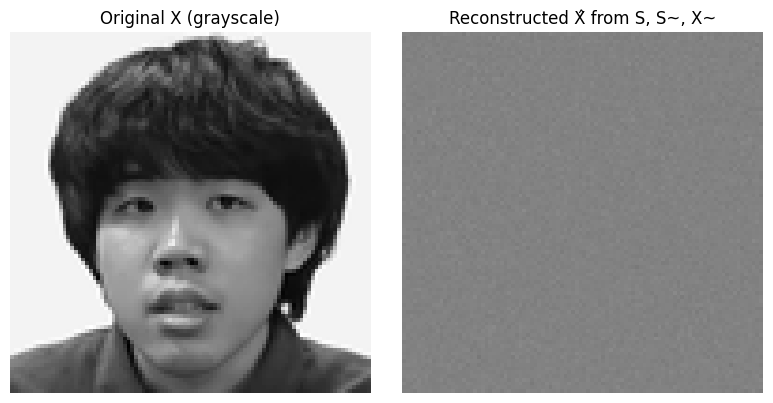

Shapes:
  X: (1, 9216)
  S: (1000, 9216)
  F (from PCA 1D): (9216, 1) ||F||^2 = 1.0
  X~: (1, 1) value = 11323.939161366554
  S~: (1000, 1)
  F_hat (from S and S~): (9216, 1)
  rank(S) via lstsq: 1000
  MSE: 5952.680541413743 PSNR(dB): 9.562633936006073
Saved files:
  X_gray.png
  X_reconstructed_from_S_Stilde_Xtilde.png
  dc_pca_1d_artifacts.npz


C:\Users\sueya\AppData\Local\Temp\ipykernel_32400\4073149519.py:122: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("  X~:", X_tilde.shape, "value =", float(X_tilde))


In [5]:
# We'll implement the pipeline the user asked for.
# Steps:
# 1) Load the provided image and convert to grayscale -> X (flattened row vector).
# 2) Downsample moderately to keep computation tractable.
# 3) Generate anchor S: 1000 random samples with the same pixel value range as the grayscale image.
# 4) Compute F (1D PCA direction) using uncentered PCA via the power method on S (no centering so that SF = S~ holds exactly).
# 5) Compute X~ = X F and S~ = S F.
# 6) (Analyst-side) Recover F* from S and S~ using least-squares: F* = argmin_F || S F - S~ ||_2.
# 7) Reconstruct X̂ from S, S~, X~: X̂ = X~ * (F*^T) / (F*^T F*).
# 8) Show original grayscale and reconstructed image; report reconstruction error. 
# 9) Save artifacts to /mnt/data.

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
from numpy.linalg import norm

# --- 1) Load & grayscale ---
img_path = "スエタケ.png"
img = Image.open(img_path).convert("L")  # grayscale

# --- 2) Downsample to manageable size ---
# Keep aspect roughly the same; pick max dimension 96 (so 96x96 or less)
max_side = 96
w, h = img.size
scale = max_side / max(w, h)
new_size = (max(1, int(round(w*scale))), max(1, int(round(h*scale))))
img_small = img.resize(new_size, Image.LANCZOS)

X_matrix = np.array(img_small, dtype=np.float64)  # values 0..255
h2, w2 = X_matrix.shape
p = h2 * w2
X = X_matrix.reshape(1, -1)  # 1 x p

# Pixel range
vmin, vmax = float(X.min()), float(X.max())

# --- 3) Anchor S ---
n_anchor = 1000
rng = np.random.default_rng(42)
S = rng.uniform(vmin, vmax, size=(n_anchor, p))

# --- 4) Compute F by uncentered PCA (top right singular vector) via power iteration ---
def top_right_singular_vector(A, n_iter=60, tol=1e-7, seed=0):
    # A: (n x p). We compute v in R^p approximating argmax ||A v|| subject to ||v||=1
    rng_local = np.random.default_rng(seed)
    v = rng_local.standard_normal(A.shape[1])
    v /= norm(v) + 1e-12
    prev_val = 0.0
    for _ in range(n_iter):
        # Multiply by A^T A without forming it explicitly
        Av = A @ v
        w = A.T @ Av
        val = norm(w)
        if val < 1e-18:
            break
        v_new = w / val
        if abs(val - prev_val) < tol * max(1.0, prev_val):
            v = v_new
            break
        v, prev_val = v_new, val
    return v

F = top_right_singular_vector(S)  # shape (p,)
F = F.reshape(-1, 1)              # p x 1
# Sanity: make ||F||^2 printable
F_norm2 = float((F.T @ F).ravel()[0])

# --- 5) Compute X~ and S~ (no centering) ---
X_tilde = (X @ F)  # 1x1
S_tilde = (S @ F)  # 1000x1

# --- 6) Recover F_hat from S and S~ ---
# Solve least squares S F_hat ≈ S_tilde; pick minimum-norm solution
# Use numpy.linalg.lstsq which uses SVD-based solver
F_hat, residuals, rank, svals = np.linalg.lstsq(S, S_tilde, rcond=None)
# F_hat shape (p,1)

# --- 7) Reconstruct X from S, S~, X~ ---
# With mapping XF = X~, the minimum-norm right-inverse is F^† = F^T/(F^T F) for rank-1 column vector.
# Using recovered F_hat:
denom = float((F_hat.T @ F_hat).ravel()[0]) + 1e-18
X_rec = (X_tilde @ (F_hat.T / denom))  # (1x1) * (1xp) -> (1xp)

# Clip, reshape back to image size
X_rec_img = X_rec.reshape(h2, w2)
X_rec_img_clipped = np.clip(X_rec_img, vmin, vmax)

# --- 8) Error metrics ---
mse = float(np.mean((X_matrix - X_rec_img_clipped)**2))
psnr = 10.0 * np.log10((vmax - vmin)**2 / (mse + 1e-18))

# --- 9) Save artifacts ---
out_dir = ""
orig_path = os.path.join(out_dir, "X_gray.png")
rec_path = os.path.join(out_dir, "X_reconstructed_from_S_Stilde_Xtilde.png")
npz_path = os.path.join(out_dir, "dc_pca_1d_artifacts.npz")

Image.fromarray(X_matrix.astype(np.uint8)).save(orig_path)
Image.fromarray(X_rec_img_clipped.astype(np.uint8)).save(rec_path)
np.savez(npz_path, S=S, S_tilde=S_tilde, X_tilde=X_tilde, F=F, F_hat=F_hat, 
         img_shape=(h2, w2), vmin=vmin, vmax=vmax)

# --- Plot to show side-by-side ---
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(X_matrix, cmap="gray", vmin=vmin, vmax=vmax)
axes[0].set_title("Original X (grayscale)")
axes[0].axis("off")

axes[1].imshow(X_rec_img_clipped, cmap="gray", vmin=vmin, vmax=vmax)
axes[1].set_title("Reconstructed X̂ from S, S~, X~")
axes[1].axis("off")

plt.tight_layout()
plt.show()

print("Shapes:")
print("  X:", X.shape)
print("  S:", S.shape)
print("  F (from PCA 1D):", F.shape, "||F||^2 =", F_norm2)
print("  X~:", X_tilde.shape, "value =", float(X_tilde))
print("  S~:", S_tilde.shape)
print("  F_hat (from S and S~):", F_hat.shape)
print("  rank(S) via lstsq:", rank)
print("  MSE:", mse, "PSNR(dB):", psnr)
print("Saved files:")
print(" ", orig_path)
print(" ", rec_path)
print(" ", npz_path)


In [28]:
# Linear PCA (k=16,64,128) and Kernel PCA (RBF) experiment.
# Reconstruction is always attempted by a "linear-PCA-believer":
#   F_hat = argmin_F || S F - S_tilde ||_F,  X_hat = X_tilde @ F_hat^\dagger
# We keep the image small enough and avoid plotting to meet runtime constraints.

import numpy as np
from PIL import Image
import os, time
from numpy.linalg import norm

t0 = time.time()

# ---------- 0) Load image, to grayscale, downsample ----------
img_path = "スエタケ.png"
img = Image.open(img_path).convert("L")

max_side = 32                   # 32x32=1024 dims for speed and MNIST-like size
w, h = img.size
scale = max_side / max(w, h)
new_size = (max(1, int(round(w*scale))), max(1, int(round(h*scale))))
img_small = img.resize(new_size, Image.Resampling.LANCZOS)

X_mat = np.array(img_small, dtype=np.float64)   # pixel values 0..255
h2, w2 = X_mat.shape
p = h2 * w2
X = X_mat.reshape(1, -1)

vmin, vmax = float(X.min()), float(X.max())

# ---------- 1) Anchor S (1000 rows) ----------
n = 1000
rng = np.random.default_rng(123)
S = rng.uniform(vmin, vmax, size=(n, p))

# Helper: save img from 1xP
def save_img(vec, shape, path):
    arr = np.clip(vec.reshape(shape), 0, 255).astype(np.uint8)
    Image.fromarray(arr).save(path)

# ---------- 2) Linear PCA using eigen of S^T S (uncentered PCA) ----------
# (a) compute Gram G = S^T S (p x p) and eigendecompose; take top-k eigenvectors
G = S.T @ S                                   # (p x p)
eigvals, eigvecs = np.linalg.eigh(G)          # ascending
order = np.argsort(eigvals)[::-1]             # descending
eigvals = eigvals[order]
eigvecs = eigvecs[:, order]                   # columns are principal directions

def pca_forward(F, Z):   # Z: (m x p), F: (p x k)
    return Z @ F         # (m x k)

def linear_recover_from_S(Stilde, Xtilde):
    # Fit F_hat by least squares: S F_hat ≈ Stilde
    # then reconstruct X_hat = Xtilde @ F_hat^\dagger
    F_hat, *_ = np.linalg.lstsq(S, Stilde, rcond=None)   # (p x k)
    # Robust pseudoinverse (right): use pinv
    F_hat_pinv = np.linalg.pinv(F_hat)                   # (k x p)
    Xhat = Xtilde @ F_hat_pinv                           # (1 x p)
    return Xhat, F_hat

ks = [800]

results = []
out_dir = ""

for k in ks:
    Fk = eigvecs[:, :k]                        # (p x k)
    Xtilde = pca_forward(Fk, X)                # (1 x k)
    Stilde = pca_forward(Fk, S)                # (n x k)
    Xhat, Fhat = linear_recover_from_S(Stilde, Xtilde)   # (1 x p)

    # Save
    out_path = os.path.join(out_dir, f"recon_linearPCA_k{k}.png")
    save_img(Xhat, (h2, w2), out_path)

    # Metrics
    mse = float(np.mean((X_mat - np.clip(Xhat.reshape(h2,w2), 0,255))**2))
    psnr = 10.0 * np.log10((255.0)**2 / (mse + 1e-18))
    results.append(("linear", k, mse, psnr, out_path))

# ---------- 3) Kernel PCA (RBF) ----------
# Build RBF kernel on S; gamma by median heuristic (subset for speed)
# Pairwise squared distances on S
S2 = np.sum(S*S, axis=1, keepdims=True)
D = S2 + S2.T - 2*(S @ S.T)           # (n x n) squared distances, symmetric, >=0

# median heuristic for gamma using all entries except diagonal
tri = D[np.triu_indices(n, k=1)]
median_sqdist = float(np.median(tri))
if median_sqdist <= 1e-12:
    median_sqdist = float(np.mean(tri) + 1.0)
gamma = 1.0 / (2.0 * median_sqdist)

K = np.exp(-gamma * D)                # (n x n)

# Center K: Kc = K - 1 K - K 1 + 1 K 1
one = np.ones((n,1)) / n
row_mean = K @ one                    # (n x 1)
col_mean = row_mean.T                 # (1 x n)
total_mean = float(col_mean @ one)    # scalar
Kc = K - row_mean @ np.ones((1,n)) - np.ones((n,1)) @ col_mean + total_mean

# Eigendecomposition
evals, evecs = np.linalg.eigh(Kc)
order_kpca = np.argsort(evals)[::-1]            # descending
evals = evals[order_kpca]
evecs = evecs[:, order_kpca]

# Keep only positive eigenvalues
pos = evals > 1e-9
evals = evals[pos]
evecs = evecs[:, pos]
# Prepare alphas = eigenvectors normalized by sqrt(eigenvalue)
alphas_full = evecs / np.sqrt(evals + 1e-18)    # (n x r)

# For mapping S, \tilde S = Kc @ alphas_k; 
# For mapping X (one sample), need centered kernel vector k_c(x,S).
def kpca_embed_S(alphas_k):
    return Kc @ alphas_k                         # (n x k)

def kpca_embed_x(x_row, alphas_k):
    # k(x,S)
    diff = S - x_row                              # (n x p)
    k = np.exp(-gamma * np.sum(diff*diff, axis=1, keepdims=True))   # (n x 1)
    # Centering: k_c = k - mean_cols(K) - mean(k)*1 + mean(K)
    # mean_cols(K) equals row_mean (since K is symmetric)
    k_mean = float(np.mean(k))
    k_c = k - row_mean - k_mean*np.ones((n,1)) + total_mean*np.ones((n,1))
    # Projection: x_tilde = k_c^T @ alphas_k
    return (k_c.T @ alphas_k)                    # (1 x k)

for k in ks:
    k_eff = min(k, alphas_full.shape[1])
    alphas_k = alphas_full[:, :k_eff]            # (n x k_eff)
    Stilde_k = kpca_embed_S(alphas_k)            # (n x k_eff)
    Xtilde_k = kpca_embed_x(X, alphas_k)         # (1 x k_eff)

    # Linear believer reconstructs:
    Xhat, Fhat = linear_recover_from_S(Stilde_k, Xtilde_k)
    out_path = os.path.join(out_dir, f"recon_kernelPCA_RBF_linear_believer_k{k}.png")
    save_img(Xhat, (h2, w2), out_path)

    mse = float(np.mean((X_mat - np.clip(Xhat.reshape(h2,w2), 0,255))**2))
    psnr = 10.0 * np.log10((255.0)**2 / (mse + 1e-18))
    results.append(("kernel(RBF)->linear_recon", k, mse, psnr, out_path))

# ---------- 4) Save the original and a summary ----------
orig_path = os.path.join(out_dir, "X_gray_28.png")
save_img(X, (h2, w2), orig_path)

# Create a small text summary
summary_path = os.path.join(out_dir, "summary_results.txt")
with open(summary_path, "w") as f:
    f.write(f"Image shape: {h2}x{w2}, p={p}, anchors={n}\n")
    f.write(f"RBF gamma (median heuristic) = {gamma:.4e}\n")
    for method, k, mse, psnr, path in results:
        f.write(f"{method:28s} k={k:3d}  MSE={mse:10.3f}  PSNR={psnr:6.2f} dB  -> {os.path.basename(path)}\n")
    f.write(f"Total runtime: {time.time()-t0:.1f} s\n")

print("Done. Files saved:")
print(" -", orig_path)
print(" -", summary_path)
for r in results:
    print(" -", r[-1])


C:\Users\sueya\AppData\Local\Temp\ipykernel_32400\1418243908.py:99: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  total_mean = float(col_mean @ one)    # scalar


Done. Files saved:
 - X_gray_28.png
 - summary_results.txt
 - recon_linearPCA_k800.png
 - recon_kernelPCA_RBF_linear_believer_k800.png


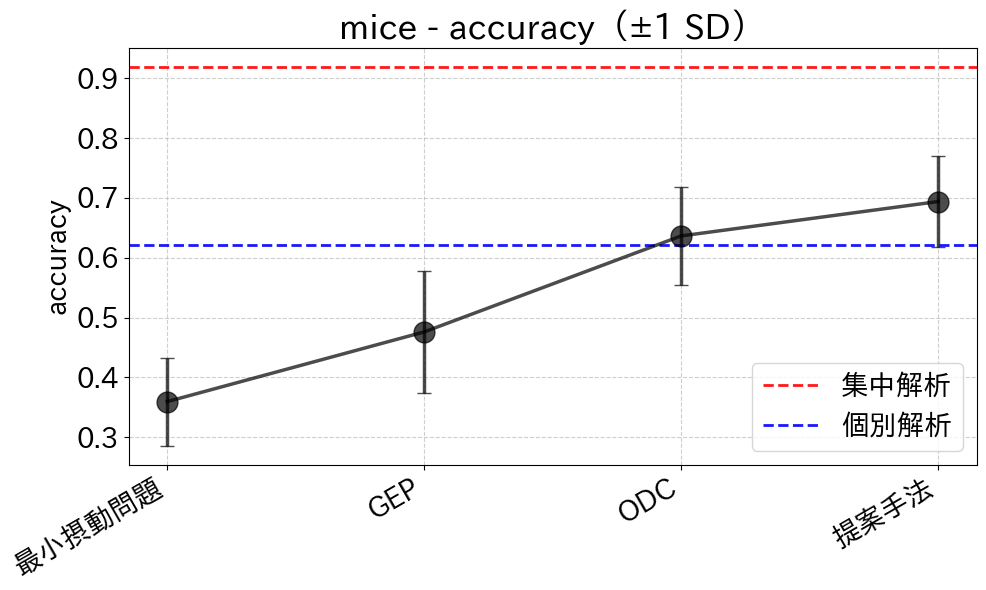

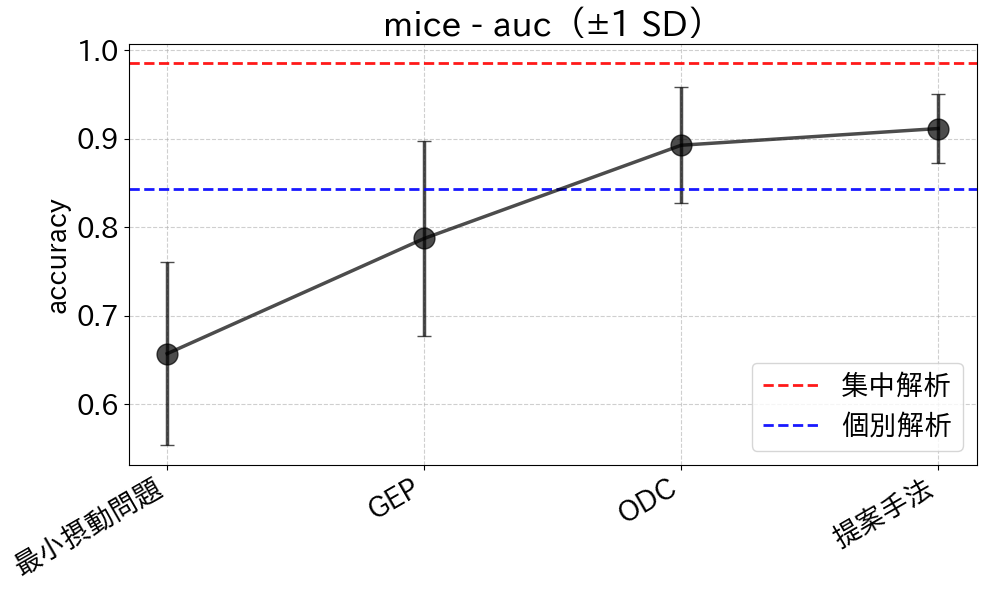

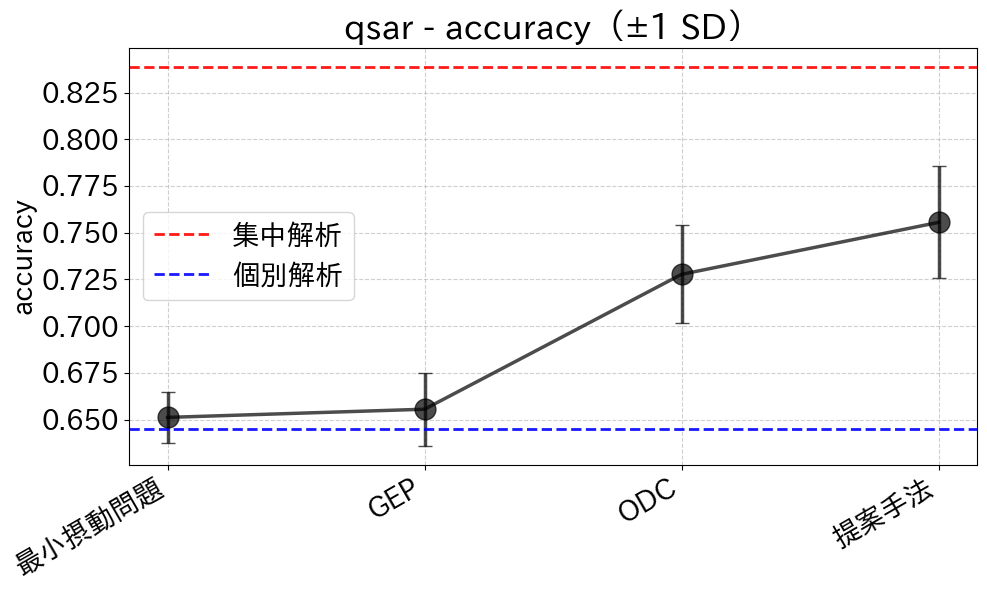

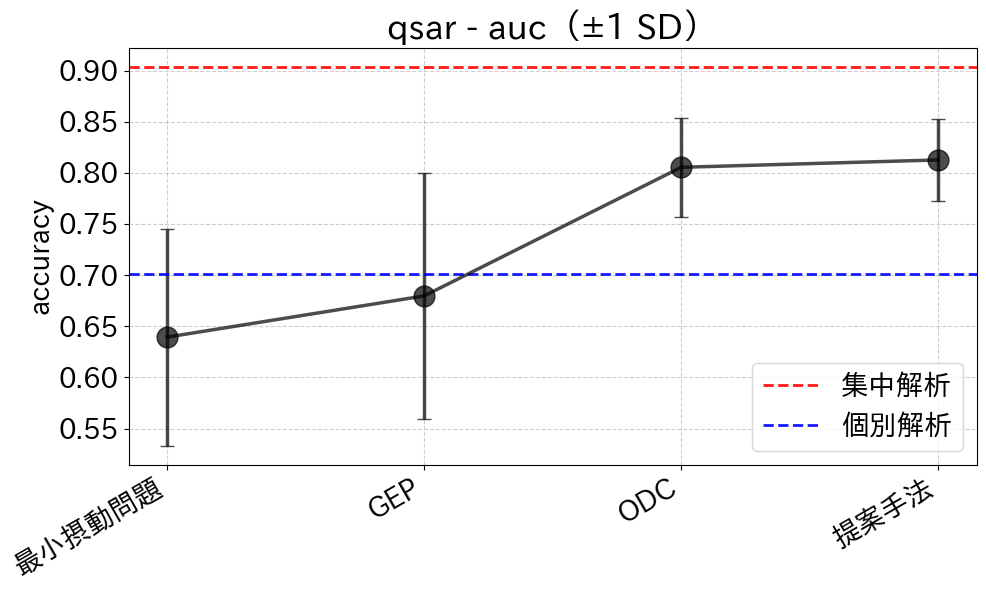

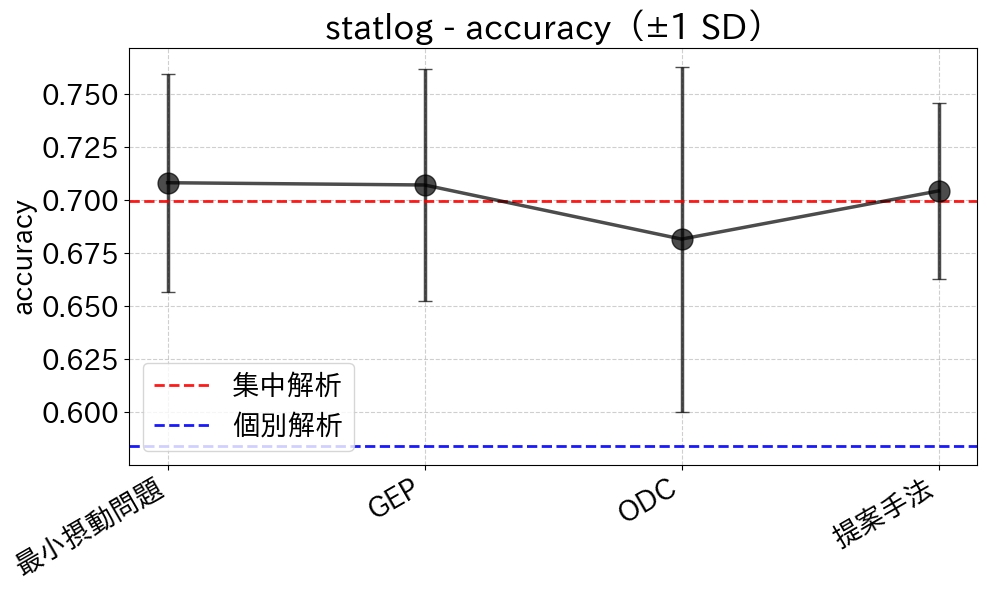

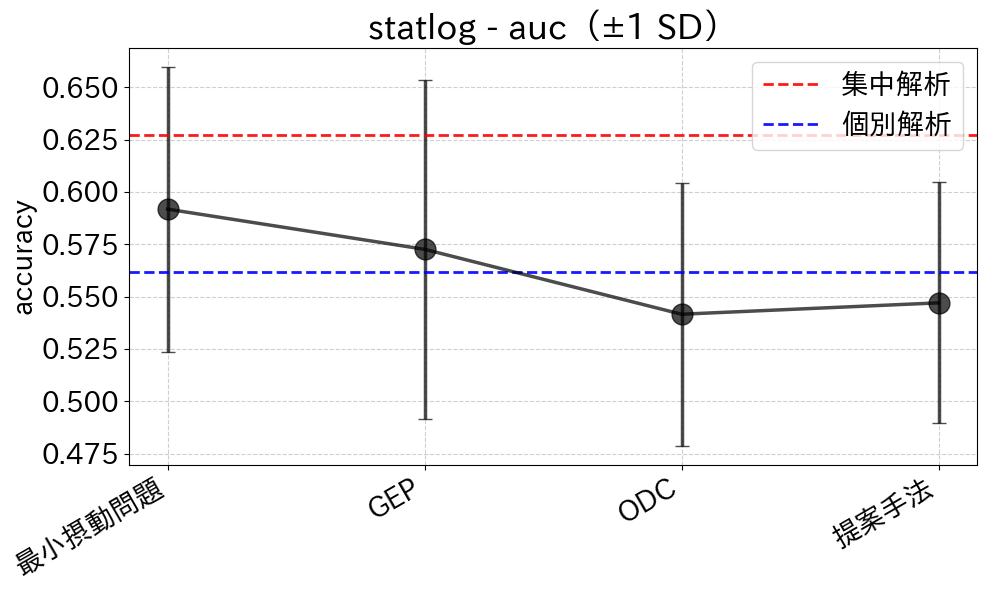

'plots_gtype_accuracy.zip'

In [37]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from zipfile import ZipFile 
import japanize_matplotlib 
 
# === 設定 === 
CSV_PATH = "result_philopt.csv" 
OUT_DIR = "plots_gtype_accuracy" 
os.makedirs(OUT_DIR, exist_ok=True) 
 
# ラベル置換マップ 
gtype_label_map = { 
    "Imakura": "最小摂動問題", 
    "nonlinear": "提案手法", 
    "centralize": "集中解析", 
    "individual": "個別解析", 
    # 他はそのまま（例: GEP, ODC） 
} 
 
# === データ読込 === 
df = pd.read_csv(CSV_PATH) 
 
# x軸から除外する基準系列（水平線で表示） 
baselines = ["centralize", "individual"] 
 
# dataset × metrics を対象 
pairs = sorted(df[["dataset", "metrics"]].drop_duplicates().itertuples(index=False, name=None)) 
 
# === 描画 === 
saved_files = [] 
for dataset, metrics in pairs: 
    mask_main = (df["dataset"] == dataset) & (df["metrics"] == metrics) & (~df["G_type"].isin(baselines)) 
    group = df[mask_main].copy() 
    if group.empty: 
        continue 
 
    x_labels = [gtype_label_map.get(g, g) for g in group["G_type"].tolist()] 
    x = np.arange(len(x_labels)) 
 
    y = group["metrics_mean"].values 
    yerr = group["metrics_stdev"].values  # ±1 SD 
 
    plt.figure(figsize=(10, 6)) 
 
    # メイン系列 
    plt.errorbar(x, y, yerr=yerr, fmt="o-", capsize=5, color="black", markersize=15, alpha=0.7, linewidth=2.5) 
 
    # 軸やタイトル（フォント大きめ） 
    plt.xticks(x, x_labels, rotation=30, ha="right", fontsize=20) 
    plt.yticks(fontsize=20) 
    plt.ylabel("accuracy", fontsize=20) 
    plt.title(f"{dataset} - {metrics}（±1 SD）", fontsize=25) 
 
    plt.grid(True, linestyle="--", alpha=0.6) 
 
    baseline_styles = { 
        "centralize": {"linestyle": "--", "color": "red", "alpha": 0.9, "label": gtype_label_map["centralize"], "linewidth": 2}, 
        "individual": {"linestyle": "--", "color": "blue", "alpha": 0.9, "label": gtype_label_map["individual"], "linewidth": 2}
    } 
    for key, style in baseline_styles.items(): 
        ref = df[(df["dataset"] == dataset) & (df["metrics"] == metrics) & (df["G_type"] == key)] 
        if not ref.empty: 
            mean_val = ref["metrics_mean"].values[0] 
            plt.axhline(mean_val, **style) 
 
    plt.legend(loc="best", fontsize=20) 
    plt.tight_layout() 
 
    out_path = os.path.join(OUT_DIR, f"{dataset}__{metrics}.png") 
    plt.savefig(out_path, dpi=150) 
    saved_files.append(out_path) 
    plt.show() 
 
# まとめてZIP 
zip_path = "plots_gtype_accuracy.zip" 
with ZipFile(zip_path, "w") as zf: 
    for p in saved_files: 
        zf.write(p, arcname=os.path.basename(p)) 
 
zip_path


新しいノートブックを作成しています:
以下は、Jupyter Notebookのセクション構成案です。色付けに関連するコードを含めています。

* **必要なライブラリのインポート**
* **データの読み込みと前処理**
* **データフレームの構築**
* **Excelファイルへの書き込み**
* **行ごとの色付け**



In [60]:
import pandas as pd
time_df = pd.read_csv(config.output_path / "timing.csv", index_col=0)

NameError: name 'config' is not defined

In [3]:
config.dataset

'har'

In [5]:
time_df 

,func,name,dataset,seed,num_institution,num_institution_user,num_anchor_data,dim_intermediate,dim_integrate,y_name,h_model,output_path,input_path,F_type,G_type
elapsed_ms,,,,,,,,,,,,,,,
407.944,make_integrate_expression,partial_run,qsar,43,1,50,3000,40,40,target,random_forest,C:\Users\sueya\Git-Repositories\takano_labo\dc...,C:\Users\sueya\Git-Repositories\takano_labo\dc...,svd,Imakura
1.653,make_integrate_expression_gen_eig,partial_run,qsar,43,1,50,3000,40,40,target,random_forest,C:\Users\sueya\Git-Repositories\takano_labo\dc...,C:\Users\sueya\Git-Repositories\takano_labo\dc...,svd,GEP
767.153,make_integrate_expression,partial_run,qsar,43,2,50,3000,40,40,target,random_forest,C:\Users\sueya\Git-Repositories\takano_labo\dc...,C:\Users\sueya\Git-Repositories\takano_labo\dc...,svd,Imakura
5.680,make_integrate_expression_gen_eig,partial_run,qsar,43,2,50,3000,40,40,target,random_forest,C:\Users\sueya\Git-Repositories\takano_labo\dc...,C:\Users\sueya\Git-Repositories\takano_labo\dc...,svd,GEP
1094.421,make_integrate_expression,partial_run,qsar,43,3,50,3000,40,40,target,random_forest,C:\Users\sueya\Git-Repositories\takano_labo\dc...,C:\Users\sueya\Git-Repositories\takano_labo\dc...,svd,Imakura
9.555,make_integrate_expression_gen_eig,partial_run,qsar,43,3,50,3000,40,40,target,random_forest,C:\Users\sueya\Git-Repositories\takano_labo\dc...,C:\Users\sueya\Git-Repositories\takano_labo\dc...,svd,GEP
1309.396,make_integrate_expression,partial_run,qsar,43,4,50,3000,40,40,target,random_forest,C:\Users\sueya\Git-Repositories\takano_labo\dc...,C:\Users\sueya\Git-Repositories\takano_labo\dc...,svd,Imakura
12.306,make_integrate_expression_gen_eig,partial_run,qsar,43,4,50,3000,40,40,target,random_forest,C:\Users\sueya\Git-Repositories\takano_labo\dc...,C:\Users\sueya\Git-Repositories\takano_labo\dc...,svd,GEP
1165.509,make_integrate_expression,partial_run,qsar,43,5,50,3000,40,40,target,random_forest,C:\Users\sueya\Git-Repositories\takano_labo\dc...,C:\Users\sueya\Git-Repositories\takano_labo\dc...,svd,Imakura


In [ ]:
time_df.columns

Index(['func', 'name', 'dataset', 'seed', 'num_institution',
       'num_institution_user', 'num_anchor_data', 'dim_intermediate',
       'dim_integrate', 'y_name', 'h_model', 'output_path', 'input_path',
       'F_type', 'G_type'],
      dtype='object')

In [ ]:
time_df

,func,name,dataset,seed,num_institution,num_institution_user,num_anchor_data,dim_intermediate,dim_integrate,y_name,h_model,output_path,input_path,F_type,G_type
elapsed_ms,,,,,,,,,,,,,,,
68.692,make_integrate_expression_gen_eig,exp004,qsar,43,10,50,3000,40,40,target,random_forest,C:\Users\sueya\Git-Repositories\takano_labo\dc...,C:\Users\sueya\Git-Repositories\takano_labo\dc...,svd,GEP_weighted


In [ ]:
# インスタンスの生成
data_collaboration = DataCollaborationAnalysis(config=config, logger=logger, train_df=train_df, test_df=test_df)

# データ分割 -> 統合表現の獲得まで一気に実行
data_collaboration.run()

********************データの分割********************


100%|██████████| 10/10 [00:00<00:00, 1701.89it/s]


num_row 3000 num_col 48
anchor [[0.11505457 0.60906654 0.13339096 ... 0.27555878 0.89674727 0.20689137]
 [0.40440524 0.99357249 0.73572708 ... 0.73986382 0.18471296 0.43467832]
 [0.8858995  0.25504628 0.44331269 ... 0.07755781 0.48690618 0.46819391]
 ...
 [0.17622189 0.81609769 0.35492882 ... 0.14924751 0.76343085 0.05190865]
 [0.20058071 0.45928436 0.12640881 ... 0.25942627 0.67589441 0.14764702]
 [0.97560645 0.94663338 0.81721479 ... 0.55127237 0.08843842 0.92236722]]
Xs_train[0].shape (50, 48) Xs_test[0].shape (50, 48)
********************中間表現の生成********************
Config(name='exp004', dataset='statlog', num_institution=10, num_institution_user=50, num_anchor_data=3000, dim_intermediate=30, dim_integrate=30, y_name='target', h_model='random_forest', output_path=WindowsPath('C:/Users/sueya/Git-Repositories/takano_labo/dca_yanagi/output/exp004'), input_path=WindowsPath('C:/Users/sueya/Git-Repositories/takano_labo/dca_yanagi/input'), seed=43)
self.config.dim_intermediate 30



100%|██████████| 10/10 [00:00<00:00, 205.80it/s]


中間表現の次元数:  48
********************統合表現の生成********************


100%|██████████| 10/10 [00:00<00:00, 29.80it/s]

統合表現の次元数:  48


In [9]:
import pandas as pd
import numpy as np
from pathlib import Path
from openpyxl import Workbook, load_workbook
from openpyxl.styles import Alignment, PatternFill

# ---------- Rebuild the wide table (same as before) ----------
input_files = [
    (r"C:\Users\sueya\Git-Repositories\takano_labo\dca_yanagi\output\exp004\result_adult.csv", "adult"),
    (r"C:\Users\sueya\Git-Repositories\takano_labo\dca_yanagi\output\exp004\result_breast_cancer.csv", "cancer"),
    (r"C:\Users\sueya\Git-Repositories\takano_labo\dca_yanagi\output\exp004\result_digits.csv", "digits"),
    (r"C:\Users\sueya\Git-Repositories\takano_labo\dca_yanagi\output\exp004\result_housing.csv", "housing"),
]

base_gtypes = ["centralize", "individual", "fl", "Imakura", "ODC", "GEP"]
nlin_gtypes = ["nonlinear", "nonlinear_linear"]
target_g = base_gtypes + nlin_gtypes

gamma_order = ["X_tuning", "auto"]
lambda_order = ["1e-08", "0.1", "1.0"]

dfs = []
for path, dsname in input_files:
    p = Path(path)
    if p.exists():
        df = pd.read_csv(p)
        df["dataset"] = dsname
        
        # 空白セルの置き換え
        if dsname in ["cancer", "digits"]:
            df = df.fillna(0)  # 空白セルを 0 に置き換え
        elif dsname == "housing":
            df = df.fillna(float('inf'))  # 空白セルを inf に置き換え
        
        dfs.append(df)

if not dfs:
    raise FileNotFoundError("入力CSVが見つかりません。")

df_all = pd.concat(dfs, axis=0, ignore_index=True)
df_all = df_all[df_all["G_type"].isin(target_g)].copy()
df_all["metrics_mean"] = pd.to_numeric(df_all["metrics_mean"], errors="coerce")

if "gamma_type" not in df_all.columns:
    df_all["gamma_type"] = ""
if "nl_lambda" not in df_all.columns:
    df_all["nl_lambda"] = ""

def nl_to_str(x):
    try:
        s = str(x)
        v = float(s)
        if np.isclose(v, 1.0): return "1.0"
        if np.isclose(v, 0.1): return "0.1"
        if np.isclose(v, 1e-08): return "1e-08"
        return s
    except Exception:
        return str(x)

df_all["gamma_type"] = df_all["gamma_type"].astype(str)
df_all["nl_lambda_str"] = df_all["nl_lambda"].apply(nl_to_str)

# Build column MultiIndex
cols_l0 = ["dataset", "model", "F_type"]
cols_l1 = ["", "", ""]
cols_l2 = ["", "", ""]
for g in base_gtypes:
    cols_l0 += [g]; cols_l1 += [""]; cols_l2 += [""]
for g in nlin_gtypes:
    for gam in gamma_order:
        for lam in lambda_order:
            cols_l0 += [g]; cols_l1 += [gam]; cols_l2 += [lam]

# Collect rows
rows = []
for (ds, model, ftype), grp in df_all.groupby(["dataset","model","F_type"], sort=True):
    row = {}
    row[("dataset","","")] = ds
    row[("model","","")] = model
    row[("F_type","","")] = ftype
    # baselines (max = representative; no averaging)
    for g in base_gtypes:
        vals = grp.loc[grp["G_type"]==g, "metrics_mean"].dropna()
        row[(g,"","")] = round(vals.max(), 3) if not vals.empty else None
    # nonlinear variants
    for g in nlin_gtypes:
        sub = grp[grp["G_type"]==g]
        for gam in gamma_order:
            for lam in lambda_order:
                mask = (sub["gamma_type"]==gam) & (sub["nl_lambda_str"]==lam)
                vals = sub.loc[mask, "metrics_mean"].dropna()
                row[(g,gam,lam)] = round(vals.max(), 3) if not vals.empty else None
    rows.append(row)

wide = pd.DataFrame(rows, columns=pd.MultiIndex.from_arrays([cols_l0, cols_l1, cols_l2]))

# ---------- Write Excel with 3-row header and row-wise coloring ----------
out_xlsx = "triheader_nonlinear_6cols_colored.xlsx"
wb = Workbook()
ws = wb.active
ws.title = "table"

# Header rows
ws.append(list(wide.columns.get_level_values(0)))
ws.append([str(x) if x is not None else "" for x in wide.columns.get_level_values(1)])
ws.append([str(x) if x is not None else "" for x in wide.columns.get_level_values(2)])

# Data rows (start at row 4)
for i in range(len(wide)):
    ws.append([wide.iloc[i, j] for j in range(wide.shape[1])])

# Number format (0.000)
ncols = wide.shape[1]
for r in range(4, 4+len(wide)):
    for c in range(1, ncols+1):
        cell = ws.cell(row=r, column=c)
        if isinstance(cell.value, (int, float)) and cell.value is not None:
            cell.number_format = "0.000"

# Center headers & freeze pane
for r in [1,2,3]:
    for c in range(1, ncols+1):
        ws.cell(row=r, column=c).alignment = Alignment(horizontal="center", vertical="center")
ws.freeze_panes = "A4"

wb.save(out_xlsx)
print(f"[Download Excel] {out_xlsx}")

[Download Excel] triheader_nonlinear_6cols_colored.xlsx


In [11]:
import pandas as pd
import numpy as np
from pathlib import Path
from openpyxl import Workbook, load_workbook
from openpyxl.styles import Alignment, PatternFill

# ---------- Rebuild the wide table (same as before) ----------
input_files = [
    (r"C:\Users\sueya\Git-Repositories\takano_labo\dca_yanagi\output\exp004\result_adult.csv", "adult"),
    (r"C:\Users\sueya\Git-Repositories\takano_labo\dca_yanagi\output\exp004\result_breast_cancer.csv", "cancer"),
    (r"C:\Users\sueya\Git-Repositories\takano_labo\dca_yanagi\output\exp004\result_digits.csv", "digits"),
    (r"C:\Users\sueya\Git-Repositories\takano_labo\dca_yanagi\output\exp004\result_housing.csv", "housing"),
]

base_gtypes = ["centralize", "individual", "fl", "Imakura", "ODC", "GEP"]
nlin_gtypes = ["nonlinear", "nonlinear_linear"]
target_g = base_gtypes + nlin_gtypes

gamma_order = ["X_tuning", "auto"]
lambda_order = ["1e-08", "0.1", "1.0"]

dfs = []
for path, dsname in input_files:
    p = Path(path)
    if p.exists():
        df = pd.read_csv(p)
        df["dataset"] = dsname
        
        # 空白セルの置き換え
        if dsname in ["cancer", "digits"]:
            df = df.fillna(0)  # 空白セルを 0 に置き換え
        elif dsname == "housing":
            df = df.fillna(float('inf'))  # 空白セルを inf に置き換え
        
        dfs.append(df)

if not dfs:
    raise FileNotFoundError("入力CSVが見つかりません。")

df_all = pd.concat(dfs, axis=0, ignore_index=True)
df_all = df_all[df_all["G_type"].isin(target_g)].copy()
df_all["metrics_mean"] = pd.to_numeric(df_all["metrics_mean"], errors="coerce")

if "gamma_type" not in df_all.columns:
    df_all["gamma_type"] = ""
if "nl_lambda" not in df_all.columns:
    df_all["nl_lambda"] = ""

def nl_to_str(x):
    try:
        s = str(x)
        v = float(s)
        if np.isclose(v, 1.0): return "1.0"
        if np.isclose(v, 0.1): return "0.1"
        if np.isclose(v, 1e-08): return "1e-08"
        return s
    except Exception:
        return str(x)

df_all["gamma_type"] = df_all["gamma_type"].astype(str)
df_all["nl_lambda_str"] = df_all["nl_lambda"].apply(nl_to_str)

# Build column MultiIndex
cols_l0 = ["dataset", "model", "F_type"]
cols_l1 = ["", "", ""]
cols_l2 = ["", "", ""]
for g in base_gtypes:
    cols_l0 += [g]; cols_l1 += [""]; cols_l2 += [""]
for g in nlin_gtypes:
    for gam in gamma_order:
        for lam in lambda_order:
            cols_l0 += [g]; cols_l1 += [gam]; cols_l2 += [lam]

# Collect rows
rows = []
for (ds, model, ftype), grp in df_all.groupby(["dataset","model","F_type"], sort=True):
    row = {}
    row[("dataset","","")] = ds
    row[("model","","")] = model
    row[("F_type","","")] = ftype
    # baselines (max = representative; no averaging)
    for g in base_gtypes:
        vals = grp.loc[grp["G_type"]==g, "metrics_mean"].dropna()
        row[(g,"","")] = round(vals.max(), 3) if not vals.empty else None
    # nonlinear variants
    for g in nlin_gtypes:
        sub = grp[grp["G_type"]==g]
        for gam in gamma_order:
            for lam in lambda_order:
                mask = (sub["gamma_type"]==gam) & (sub["nl_lambda_str"]==lam)
                vals = sub.loc[mask, "metrics_mean"].dropna()
                row[(g,gam,lam)] = round(vals.max(), 3) if not vals.empty else None
    rows.append(row)

wide = pd.DataFrame(rows, columns=pd.MultiIndex.from_arrays([cols_l0, cols_l1, cols_l2]))

# ---------- Write Excel with 3-row header and row-wise coloring ----------
out_xlsx = "triheader_nonlinear_6cols_colored.xlsx"
wb = Workbook()
ws = wb.active
ws.title = "table"

# Header rows
ws.append(list(wide.columns.get_level_values(0)))
ws.append([str(x) if x is not None else "" for x in wide.columns.get_level_values(1)])
ws.append([str(x) if x is not None else "" for x in wide.columns.get_level_values(2)])

# Data rows (start at row 4)
for i in range(len(wide)):
    ws.append([wide.iloc[i, j] for j in range(wide.shape[1])])

# Number format (0.000)
ncols = wide.shape[1]
for r in range(4, 4+len(wide)):
    for c in range(1, ncols+1):
        cell = ws.cell(row=r, column=c)
        if isinstance(cell.value, (int, float)) and cell.value is not None:
            cell.number_format = "0.000"

# Center headers & freeze pane
for r in [1,2,3]:
    for c in range(1, ncols+1):
        ws.cell(row=r, column=c).alignment = Alignment(horizontal="center", vertical="center")
ws.freeze_panes = "A4"

# Row-wise coloring
fill_top1 = PatternFill(start_color="FFCCCC", end_color="FFCCCC", fill_type="solid")  # red
fill_top2 = PatternFill(start_color="CCE0FF", end_color="CCE0FF", fill_type="solid")  # blue
fill_top3 = PatternFill(start_color="CCFFCC", end_color="CCFFCC", fill_type="solid")  # green

# Identify columns to include in coloring
include_cols = []
for c in range(1, ncols+1):
    top_name = ws.cell(row=1, column=c).value
    if top_name in {"Imakura", "ODC", "GEP", "nonlinear", "nonlinear_linear"}:
        include_cols.append(c)

for r in range(4, 4+len(wide)):
    dataset_name = ws.cell(row=r, column=1).value
    vals = []
    for c in include_cols:
        cell = ws.cell(row=r, column=c)
        try:
            v = float(cell.value) if cell.value is not None and cell.value != "" else float('inf')
        except (TypeError, ValueError):
            v = float('inf')
        vals.append((c, v))

    if dataset_name == "housing":
        uniq_vals = sorted(vals, key=lambda x: x[1])  # 小さい順
    else:
        uniq_vals = sorted(vals, key=lambda x: x[1], reverse=True)  # 大きい順

    top_vals = uniq_vals[:3]

    for i, (c, v) in enumerate(top_vals):
        if v == float('inf'):
            continue
        if i == 0:
            ws.cell(row=r, column=c).fill = fill_top1
        elif i == 1:
            ws.cell(row=r, column=c).fill = fill_top2
        elif i == 2:
            ws.cell(row=r, column=c).fill = fill_top3

wb.save(out_xlsx)
print(f"[Download Excel] {out_xlsx}")

[Download Excel] triheader_nonlinear_6cols_colored.xlsx


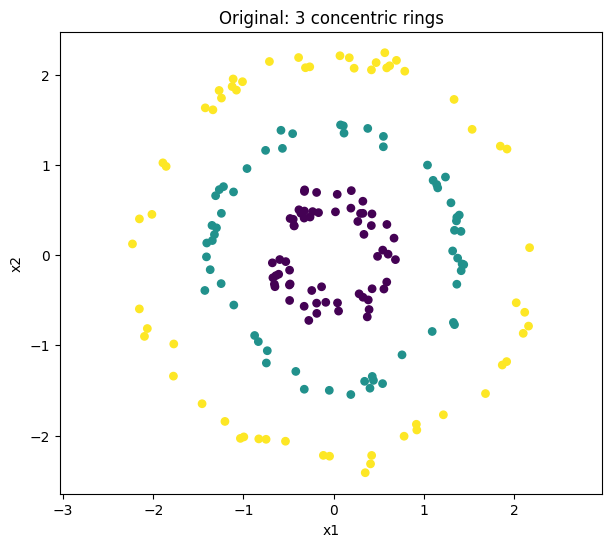

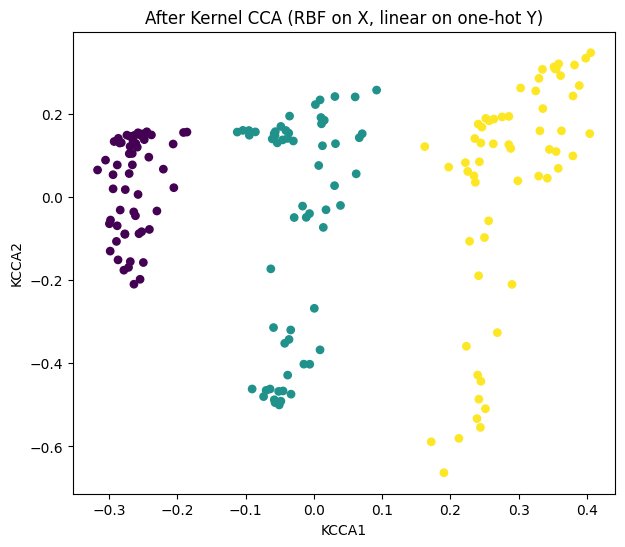

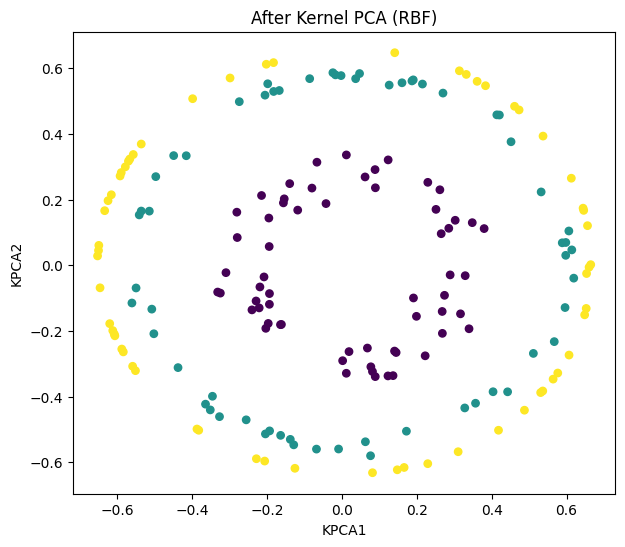

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# ===== Kernel CCA utilities =====
def center_gram(K):
    n = K.shape[0]
    H = np.eye(n) - np.ones((n,n))/n
    return H @ K @ H, H

def rbf_kernel(A, B, gamma):
    A2 = np.sum(A*A, axis=1, keepdims=True)
    B2 = np.sum(B*B, axis=1, keepdims=True).T
    sq = A2 + B2 - 2*A@B.T
    return np.exp(-gamma * np.clip(sq, 0, None))

def linear_kernel(A, B):
    return A @ B.T

def median_heuristic_gamma(X):
    D = np.sum(X*X,1,keepdims=True) + np.sum(X*X,1,keepdims=True).T - 2*X@X.T
    d = np.sqrt(np.clip(D, 0, None))
    med = np.median(d[d>0])
    if not np.isfinite(med) or med <= 0:
        med = 1.0
    return 1.0/(2.0*med*med)

def kcca_fit(X, Y, lam_x=1e-3, lam_y=1e-3, n_comp=2):
    gamma_x = median_heuristic_gamma(X)
    Kx = rbf_kernel(X, X, gamma_x)
    Ky = linear_kernel(Y, Y)

    Kx, H = center_gram(Kx)
    Ky, _ = center_gram(Ky)

    n = X.shape[0]
    Ax = Kx + lam_x*np.eye(n)
    Ay = Ky + lam_y*np.eye(n)

    ex, Ux = np.linalg.eigh(Ax)
    ey, Uy = np.linalg.eigh(Ay)
    ex = np.clip(ex, 1e-10, None)
    ey = np.clip(ey, 1e-10, None)
    Ax_invhalf = (Ux * (ex**-0.5)) @ Ux.T
    Ay_invhalf = (Uy * (ey**-0.5)) @ Uy.T

    C = Ax_invhalf @ Kx @ Ky @ Ay_invhalf
    U, S, Vt = np.linalg.svd(C, full_matrices=False)
    U = U[:, :n_comp]; Vt = Vt[:n_comp, :]; S = S[:n_comp]

    alpha = Ax_invhalf @ U
    beta  = Ay_invhalf @ Vt.T
    return {"alpha": alpha, "beta": beta, "H": H, "X": X, "Y": Y, "gamma_x": gamma_x, "Svals": S}

def kcca_transform_X(fit, Xnew):
    X = fit["X"]; alpha = fit["alpha"]; H = fit["H"]; gamma_x = fit["gamma_x"]
    Kx_new = rbf_kernel(Xnew, X, gamma_x)
    r = Kx_new.shape[0]
    Hr = np.eye(r) - np.ones((r,r))/r
    Kx_new_c = Hr @ (Kx_new @ H)
    U_new = Kx_new_c @ alpha
    return U_new

# ===== Kernel PCA (for comparison) =====
from sklearn.decomposition import KernelPCA
def kpca_fit_transform(X, n_comp=2):
    gamma = median_heuristic_gamma(X)
    kpca = KernelPCA(n_components=n_comp, kernel="rbf", gamma=gamma, fit_inverse_transform=False)
    Z = kpca.fit_transform(X)
    return Z

# ===== 1) Make concentric circles (3 classes) =====
np.random.seed(123)

n_per_ring = 60  # keep modest to avoid heavy eigendecomps
radii = [0.6, 1.4, 2.2]
X_list = []
y_list = []
for k, r0 in enumerate(radii):
    r = np.random.normal(loc=r0, scale=0.08, size=n_per_ring)  # small radial noise
    th = np.random.uniform(0, 2*np.pi, size=n_per_ring)
    x = np.c_[r*np.cos(th), r*np.sin(th)]
    X_list.append(x)
    y_list.append(np.full(n_per_ring, k, dtype=int))

X = np.vstack(X_list)         # (N,2)
y = np.concatenate(y_list)    # (N,)
N = X.shape[0]

# One-hot Y
t = len(np.unique(y))
Y = np.zeros((N, t), dtype=float)
Y[np.arange(N), y] = 1.0

# ===== 2) KCCA (RBF on X, linear on Y) =====
fit = kcca_fit(X, Y, lam_x=1e-3, lam_y=1e-3, n_comp=2)
Z_kcca = kcca_transform_X(fit, X)

# ===== 3) KPCA (RBF) for comparison =====
Z_kpca = kpca_fit_transform(X, n_comp=2)

# ===== 4) Plots (each figure one chart) =====

# Original concentric circles
plt.figure(figsize=(7,6))
plt.scatter(X[:,0], X[:,1], c=y, s=28)
plt.title("Original: 3 concentric rings")
plt.xlabel("x1"); plt.ylabel("x2")
plt.axis("equal")
plt.show()

# After Kernel CCA
plt.figure(figsize=(7,6))
plt.scatter(Z_kcca[:,0], Z_kcca[:,1], c=y, s=28)
plt.title("After Kernel CCA (RBF on X, linear on one-hot Y)")
plt.xlabel("KCCA1"); plt.ylabel("KCCA2")
plt.show()

# After Kernel PCA (unsupervised)
plt.figure(figsize=(7,6))
plt.scatter(Z_kpca[:,0], Z_kpca[:,1], c=y, s=28)
plt.title("After Kernel PCA (RBF)")
plt.xlabel("KPCA1"); plt.ylabel("KPCA2")
plt.show()


In [ ]:
import os 
child_path = os.getcwd()
# 親ディレクトリを取得
parent_path = os.path.dirname(child_path)

# カレントディレクトリを移動
os.chdir(parent_path)
columns = [
        "SpMax_L", "J_Dz(e)", "nHM", "F01[N-N]", "F04[C-N]", "NssssC", "nCb-", "C%",
        "nCp", "nO", "F03[C-N]", "SdssC", "HyWi_B(m)", "LOC", "SM6_L", "F03[C-O]",
        "Me", "Mi", "nN-N", "nArNO2", "nCRX3", "SpPosA_B(p)", "nCIR", "B01[C-Br]",
        "B03[C-Cl]", "N-073", "SpMax_A", "Psi_i_1d", "B04[C-Br]", "SdO", "TI2_L",
        "nCrt", "C-026", "F02[C-N]", "nHDon", "SpMax_B(m)", "Psi_i_A", "nN",
        "SM6_B(m)", "nArCOOR", "nX", "target"
    ]
import pandas as pd
# データ読み込み（区切り文字は ';'）
df = pd.read_csv("input/qsar+biodegradation/biodeg.csv", header=None, sep=";")
df.columns = columns

# ターゲット変換：RB → 1（ready biodeg）、NRB → 0（not ready）
df["target"] = df["target"].map({"RB": 1, "NRB": 0})

In [ ]:
df

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,target
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,1
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,1
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,1
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,1
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,5.431,2.8955,0,0,0,2,0,32.1,4,1,...,0,6,1,3.573,2.242,1,8.088,0,0,0
1051,5.287,3.3732,0,0,9,0,0,35.3,0,9,...,0,3,0,3.787,3.083,3,9.278,0,0,0
1052,4.869,1.7670,0,1,9,0,5,44.4,0,4,...,4,13,0,3.848,2.576,5,9.537,1,0,0
1053,5.158,1.6914,2,0,36,0,9,56.1,0,0,...,1,16,0,5.808,2.055,8,11.055,0,1,0


In [ ]:
data_collaboration.X_train_integ

array([[12, 2390, 4, ..., False, True, False],
       [12, 1493, 4, ..., False, False, False],
       [36, 2820, 4, ..., False, False, False],
       ...,
       [60, 7418, 1, ..., False, False, False],
       [30, 4249, 4, ..., True, False, False],
       [12, 886, 4, ..., False, False, False]], dtype=object)

In [ ]:
data_collaboration.train_df

,col1,col4,col7,col10,col12,col15,col17,col0_A12,col0_A13,col0_A14,...,col13_A142,col13_A143,col14_A152,col14_A153,col16_A172,col16_A173,col16_A174,col18_A192,col19_A202,target
0,12,2390,4,3,50,1,1,False,False,True,...,False,True,True,False,False,True,False,True,False,1
1,12,1493,4,3,34,1,2,False,False,True,...,False,True,True,False,False,True,False,False,False,1
2,36,2820,4,4,27,2,1,True,False,False,...,False,True,True,False,False,True,False,False,False,2
3,24,11560,1,4,23,2,1,True,False,False,...,False,True,False,False,False,False,True,False,False,2
4,15,2728,4,2,35,3,1,True,False,False,...,False,False,True,False,False,True,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,12,1262,2,4,49,1,1,False,False,False,...,False,True,True,False,True,False,False,True,False,1
496,6,1554,1,2,24,2,1,False,False,True,...,False,True,False,False,False,True,False,True,False,1
497,60,7418,1,1,27,1,1,True,False,False,...,False,True,True,False,True,False,False,False,False,1
498,30,4249,4,2,28,2,1,True,False,False,...,False,True,True,False,False,False,True,False,False,2


In [ ]:
# 集中解析
centralize_analysis(config, logger, y_name=config.y_name)

# 個別解析
individual_analysis(
config=config,
logger=logger,
Xs_train=data_collaboration.Xs_train,
ys_train=data_collaboration.ys_train,
Xs_test=data_collaboration.Xs_test,
ys_test=data_collaboration.ys_test,

)

# 提案手法
dca_analysis(
    X_train_integ=data_collaboration.X_train_integ,
    X_test_integ=data_collaboration.X_test_integ,
    y_train_integ=data_collaboration.y_train_integ,
    y_test_integ=data_collaboration.y_test_integ,
    config=config,
    logger=logger,
)

y_name = 'target'
train_df = train_df.copy()
test_df = test_df.copy()
y_train = train_df[y_name]
X_train = train_df.drop(y_name, axis=1)
y_test = test_df[y_name]
X_test = test_df.drop(y_name, axis=1)

# 提案手法
dca_analysis(
    X_train_integ=X_train,
    y_train_integ=y_train,
    X_test_integ=X_test,
    y_test_integ=y_test,
    config=config,
    logger=logger,
)

# train_df, test_df = load_data(config=config)
# y_name = config.y_name
# y_train = train_df.pop(y_name).values
# y_test = test_df.pop(y_name).values

# X_train = train_df.values
# X_test = test_df.values
# dca_analysis(
#     X_train_integ=X_train,
#     y_train_integ=y_train,
#     X_test_integ=X_test,
#     y_test_integ=y_test,
#     config=config,
#     logger=logger,
# )



In [ ]:
import numpy as np
model = data_collaboration

# ① 元の訓練特徴行列（DataFrame → ndarray）
X_train_df_vals = model.train_df.drop(columns=model.config.y_name).values

# ② 統合後の訓練特徴行列
X_train_integ = model.X_train_integ

# 形状が同じか
print("shape:", X_train_df_vals.shape, X_train_integ.shape)

# 完全一致判定（dtype も含めて）
is_equal = np.array_equal(X_train_df_vals, X_train_integ)
print("完全一致？", is_equal)

# 数値誤差込みで確認したい場合（浮動小数点誤差が気になるとき）
is_close = np.allclose(X_train_df_vals, X_train_integ, atol=1e-12)
print("allclose？", is_close)

# もし False なら差分の最大値を見る
if not is_equal:
    diff_max = np.abs(X_train_df_vals - X_train_integ).max()
    print("要素差の最大値:", diff_max)

shape: (500, 48) (500, 48)
完全一致？ True


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
self = data_collaboration
self.Xs_train, self.Xs_test, self.ys_train, self.ys_test = self.train_test_split(
    train_df=self.train_df,
    test_df=self.test_df,
    num_institution=self.config.num_institution,
    num_institution_user=self.config.num_institution_user,
    y_name=self.config.y_name,
)

********************データの分割********************


100%|██████████| 9/9 [00:00<00:00, 520.47it/s]


In [ ]:
self.train_df

,subject,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",target
0,5,0.260480,-0.032310,-0.066292,-0.976873,-0.779216,-0.874830,-0.978905,-0.779862,-0.877856,...,0.201887,-0.188315,0.087804,0.020336,0.085813,-0.361440,-0.908870,0.141712,-0.030348,5
1,30,0.275524,-0.014530,-0.094176,-0.997408,-0.969633,-0.988884,-0.998142,-0.970498,-0.989849,...,-0.381182,-0.808719,0.030250,0.238178,0.707377,0.885212,-0.934482,0.117491,-0.026064,5
2,12,0.284224,0.001572,-0.099114,-0.099672,-0.094548,-0.578631,-0.155997,-0.153726,-0.576249,...,-0.083218,-0.480254,0.003401,-0.944625,-0.700109,0.015062,-0.872035,0.185065,0.035282,1
3,1,0.237154,0.007825,-0.122838,-0.979954,-0.866193,-0.968290,-0.980179,-0.882316,-0.966097,...,-0.444482,-0.816502,0.321250,-0.050328,0.584280,-0.426198,-0.654356,0.006141,-0.212753,4
4,1,0.285415,0.016834,-0.106884,-0.324009,0.129619,-0.012624,-0.354572,0.098502,0.073785,...,-0.732537,-0.960982,0.192449,-0.317324,-0.949011,0.560496,-0.609545,0.361467,0.075794,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5053,3,0.262230,-0.016215,-0.139427,-0.416786,-0.106049,-0.312882,-0.449481,-0.124725,-0.277529,...,0.244469,-0.074119,0.065696,0.137927,0.972675,-0.551858,-0.575794,0.351126,0.165120,2
5054,24,0.258587,-0.006958,-0.094029,-0.485825,-0.255627,-0.287639,-0.494420,-0.262824,-0.292375,...,0.395960,0.205011,0.449331,-0.357677,0.973246,-0.461628,-0.808655,0.180537,0.125777,1
5055,3,0.281441,0.022608,-0.005444,-0.342525,-0.080141,-0.419493,-0.372983,-0.097087,-0.438115,...,0.022938,-0.327122,0.140679,-0.830736,-0.749077,0.246029,-0.730683,0.262451,0.107399,1
5056,17,0.269284,-0.019122,-0.119044,-0.993520,-0.971380,-0.981386,-0.993374,-0.969525,-0.980839,...,-0.808637,-0.955617,0.031545,-0.104858,0.336990,0.435159,-0.595726,0.225426,0.274263,5


In [ ]:
(self.Xs_train[0]).shape

In [ ]:
(self.Xs_train[0]).shape

(562, 562)

In [ ]:
data_collaboration.X_train_integ

array([[-0.02199168, -0.00193741,  0.03037781, ...,  0.02089628,
        -0.02949354, -0.0365137 ],
       [-0.0215623 ,  0.1480495 ,  0.00143068, ...,  0.09192154,
        -0.17395793, -0.13523286],
       [-0.01261774,  0.06383755, -0.01167625, ...,  0.02984417,
        -0.07177247, -0.08207228],
       ...,
       [-0.01445803,  0.00931933,  0.01107408, ...,  0.02749681,
        -0.00056695, -0.01858404],
       [-0.0222488 ,  0.07548985,  0.01232103, ...,  0.07996689,
        -0.07128218, -0.06238973],
       [-0.00951358,  0.12734982, -0.0256818 , ...,  0.14801013,
        -0.106917  , -0.0707165 ]])

In [ ]:
 train_df

,subject,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",target
0,5,0.260480,-0.032310,-0.066292,-0.976873,-0.779216,-0.874830,-0.978905,-0.779862,-0.877856,...,0.201887,-0.188315,0.087804,0.020336,0.085813,-0.361440,-0.908870,0.141712,-0.030348,5
1,30,0.275524,-0.014530,-0.094176,-0.997408,-0.969633,-0.988884,-0.998142,-0.970498,-0.989849,...,-0.381182,-0.808719,0.030250,0.238178,0.707377,0.885212,-0.934482,0.117491,-0.026064,5
2,12,0.284224,0.001572,-0.099114,-0.099672,-0.094548,-0.578631,-0.155997,-0.153726,-0.576249,...,-0.083218,-0.480254,0.003401,-0.944625,-0.700109,0.015062,-0.872035,0.185065,0.035282,1
3,1,0.237154,0.007825,-0.122838,-0.979954,-0.866193,-0.968290,-0.980179,-0.882316,-0.966097,...,-0.444482,-0.816502,0.321250,-0.050328,0.584280,-0.426198,-0.654356,0.006141,-0.212753,4
4,1,0.285415,0.016834,-0.106884,-0.324009,0.129619,-0.012624,-0.354572,0.098502,0.073785,...,-0.732537,-0.960982,0.192449,-0.317324,-0.949011,0.560496,-0.609545,0.361467,0.075794,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5053,3,0.262230,-0.016215,-0.139427,-0.416786,-0.106049,-0.312882,-0.449481,-0.124725,-0.277529,...,0.244469,-0.074119,0.065696,0.137927,0.972675,-0.551858,-0.575794,0.351126,0.165120,2
5054,24,0.258587,-0.006958,-0.094029,-0.485825,-0.255627,-0.287639,-0.494420,-0.262824,-0.292375,...,0.395960,0.205011,0.449331,-0.357677,0.973246,-0.461628,-0.808655,0.180537,0.125777,1
5055,3,0.281441,0.022608,-0.005444,-0.342525,-0.080141,-0.419493,-0.372983,-0.097087,-0.438115,...,0.022938,-0.327122,0.140679,-0.830736,-0.749077,0.246029,-0.730683,0.262451,0.107399,1
5056,17,0.269284,-0.019122,-0.119044,-0.993520,-0.971380,-0.981386,-0.993374,-0.969525,-0.980839,...,-0.808637,-0.955617,0.031545,-0.104858,0.336990,0.435159,-0.595726,0.225426,0.274263,5


In [ ]:
train_df

,subject,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",target
0,5,0.260480,-0.032310,-0.066292,-0.976873,-0.779216,-0.874830,-0.978905,-0.779862,-0.877856,...,0.201887,-0.188315,0.087804,0.020336,0.085813,-0.361440,-0.908870,0.141712,-0.030348,5
1,30,0.275524,-0.014530,-0.094176,-0.997408,-0.969633,-0.988884,-0.998142,-0.970498,-0.989849,...,-0.381182,-0.808719,0.030250,0.238178,0.707377,0.885212,-0.934482,0.117491,-0.026064,5
2,12,0.284224,0.001572,-0.099114,-0.099672,-0.094548,-0.578631,-0.155997,-0.153726,-0.576249,...,-0.083218,-0.480254,0.003401,-0.944625,-0.700109,0.015062,-0.872035,0.185065,0.035282,1
3,1,0.237154,0.007825,-0.122838,-0.979954,-0.866193,-0.968290,-0.980179,-0.882316,-0.966097,...,-0.444482,-0.816502,0.321250,-0.050328,0.584280,-0.426198,-0.654356,0.006141,-0.212753,4
4,1,0.285415,0.016834,-0.106884,-0.324009,0.129619,-0.012624,-0.354572,0.098502,0.073785,...,-0.732537,-0.960982,0.192449,-0.317324,-0.949011,0.560496,-0.609545,0.361467,0.075794,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5053,3,0.262230,-0.016215,-0.139427,-0.416786,-0.106049,-0.312882,-0.449481,-0.124725,-0.277529,...,0.244469,-0.074119,0.065696,0.137927,0.972675,-0.551858,-0.575794,0.351126,0.165120,2
5054,24,0.258587,-0.006958,-0.094029,-0.485825,-0.255627,-0.287639,-0.494420,-0.262824,-0.292375,...,0.395960,0.205011,0.449331,-0.357677,0.973246,-0.461628,-0.808655,0.180537,0.125777,1
5055,3,0.281441,0.022608,-0.005444,-0.342525,-0.080141,-0.419493,-0.372983,-0.097087,-0.438115,...,0.022938,-0.327122,0.140679,-0.830736,-0.749077,0.246029,-0.730683,0.262451,0.107399,1
5056,17,0.269284,-0.019122,-0.119044,-0.993520,-0.971380,-0.981386,-0.993374,-0.969525,-0.980839,...,-0.808637,-0.955617,0.031545,-0.104858,0.336990,0.435159,-0.595726,0.225426,0.274263,5


In [2]:
pip install numpy pandas scikit-learn umap-learn matplotlib tensorflow

  Using cached wrapt-1.17.3-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
  Using cached rich-14.1.0-py3-none-any.whl.metadata (18 kB)
  Using cached markdown_it_py-4.0.0-py3-none-any.whl.metadata (7.3 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/331.8 MB ? eta -:--:--
    --------------------------------------- 6.3/331.8 MB 29.7 MB/s eta 0:00:11
   - -------------------------------------- 13.6/331.8 MB 32.9 MB/s eta 0:00:10
   -- ------------------------------------- 21.0/331.8 MB 33.1 MB/s eta 0:00:10
   --- ------------------------------------ 28.3/331.8 MB 33.2 MB/s eta 0:00:10
   ---- ----------------------------------- 35.1/331.8 MB 33.3 MB/s eta 0:00:09
   ----- ---------------------------------- 41.9/331.8 MB 33.3 MB/s eta 0:00:09
   ----- ---------------------------------- 49.3/331.8 MB 33.4 MB/s eta 0:00:09
   ------ --------------------------------- 56.9/331.8 MB 33.6 MB/s eta 0:00:09
   ------- -------------

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\Users\\sueya\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\datacollaborationanalysis-jS9KJoip-py3.11\\Lib\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\lib\\security\\credentials\\gcp_service_account_identity\\gcp_service_account_identity_credentials.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install numpy pandas scikit-learn umap-learn matplotlib torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
"""
MNIST (digits 0,1,2 限定): 非線形次元削減 (KPCA / UMAP / AutoEncoder[PyTorch]) は PCA をいつ上回るか？
学習データ数を増やしながら **AUC(OVR)** で比較する実験スクリプト。

- 次元: 2, 8, 32
- 分類器: LogisticRegression, SVC(RBF, probability=True)
- 指標: multiclass ROC-AUC (one-vs-rest)
- データ: MNIST を 0/1/2 の 3 クラスにフィルタ
- 実行: ノートブックから `run_experiment(...)` を呼ぶ（CLI も可）

依存:
    pip install numpy pandas scikit-learn umap-learn matplotlib torch
"""

from __future__ import annotations
import argparse
import os
from dataclasses import dataclass
from typing import Dict, List, Tuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# UMAP は任意
try:
    from umap import UMAP
except Exception:
    UMAP = None

# PyTorch (AE 用)
try:
    import torch
    import torch.nn as nn
    from torch.utils.data import DataLoader, TensorDataset, random_split
except Exception:
    torch = None
    nn = None

RNG = np.random.RandomState(42)

# ===== Data Loading =====

def load_mnist_012(normalize: bool = True) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """OpenML から MNIST を取得し、ラベル 0/1/2 のみ抽出して返す。
    返り値: X_train, y_train, X_test, y_test
    """
    d = fetch_openml("mnist_784", version=1, as_frame=False)
    X = d["data"].astype("float32")
    y = d["target"].astype(int)
    if normalize:
        X /= 255.0
    mask = np.isin(y, [0, 1, 2, 3, 4, 5])
    X = X[mask]
    y = y[mask]
    # テスト 5000 を確保（クラス比維持）
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=5000, random_state=42, stratify=y
    )
    return X_train, y_train, X_test, y_test


def stratified_subsample(X: np.ndarray, y: np.ndarray, n: int, random_state: int = 42):
    if n >= len(y):
        return X, y
    from sklearn.model_selection import StratifiedShuffleSplit
    sss = StratifiedShuffleSplit(n_splits=1, train_size=n, random_state=random_state)
    idx = next(sss.split(X, y))[0]
    return X[idx], y[idx]


def median_heuristic_gamma(X: np.ndarray, max_samples: int = 2000) -> float:
    n = min(len(X), max_samples)
    idx = RNG.choice(len(X), size=n, replace=False)
    Xs = X[idx]
    dists = np.linalg.norm(Xs[:, None, :] - Xs[None, :, :], axis=2)
    med = np.median(dists[dists > 0])
    if med <= 0 or not np.isfinite(med):
        return 1.0
    return 1.0 / (2.0 * (med ** 2))

# ===== PyTorch AutoEncoder =====

class _AE(nn.Module):
    def __init__(self, input_dim: int, latent_dim: int):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 256), nn.ReLU(),
            nn.Linear(256, 128), nn.ReLU(),
            nn.Linear(128, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128), nn.ReLU(),
            nn.Linear(128, 256), nn.ReLU(),
            nn.Linear(256, input_dim), nn.Sigmoid()
        )
    def forward(self, x):
        z = self.encoder(x)
        xhat = self.decoder(z)
        return xhat


def _train_torch_autoencoder(X_train_np: np.ndarray, input_dim: int, latent_dim: int, epochs: int, batch: int) -> _AE:
    if torch is None:
        raise RuntimeError("PyTorch not installed")
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = _AE(input_dim, latent_dim).to(device)
    opt = torch.optim.Adam(model.parameters(), lr=1e-3)
    crit = nn.MSELoss()

    X = torch.from_numpy(X_train_np.astype(np.float32))
    ds = TensorDataset(X)
    n_total = len(ds)
    n_val = max(1, int(0.1 * n_total))
    n_tr = max(1, n_total - n_val)
    tr_set, va_set = random_split(ds, [n_tr, n_val], generator=torch.Generator().manual_seed(42))
    dl_tr = DataLoader(tr_set, batch_size=batch, shuffle=True)
    dl_va = DataLoader(va_set, batch_size=batch, shuffle=False)

    best_state, best_val, patience, bad = None, float("inf"), 3, 0
    for ep in range(epochs):
        model.train()
        for (xb,) in dl_tr:
            xb = xb.to(device)
            opt.zero_grad()
            loss = crit(model(xb), xb)
            loss.backward()
            opt.step()
        # val
        model.eval()
        va = 0.0
        with torch.no_grad():
            for (xb,) in dl_va:
                xb = xb.to(device)
                va += crit(model(xb), xb).item() * xb.size(0)
        va /= max(1, len(va_set))
        if va + 1e-8 < best_val:
            best_val, best_state, bad = va, {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}, 0
        else:
            bad += 1
            if bad >= patience:
                break
    if best_state is not None:
        model.load_state_dict(best_state)
    return model


def _encode_with_torch(model: _AE, X_np: np.ndarray) -> np.ndarray:
    if torch is None:
        raise RuntimeError("PyTorch not installed")
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.eval()
    X = torch.from_numpy(X_np.astype(np.float32)).to(device)
    outs = []
    with torch.no_grad():
        bs = 2048
        for i in range(0, X.shape[0], bs):
            z = model.encoder(X[i:i+bs])
            outs.append(z.detach().cpu().numpy())
    return np.concatenate(outs, axis=0)

# ===== DR & Evaluation =====

def fit_transform_dr(method: str, X_train: np.ndarray, X_test: np.ndarray, dim: int, umap_neighbors: int, epochs: int, batch: int) -> Tuple[np.ndarray, np.ndarray]:
    if method == "pca":
        dr = PCA(n_components=dim, random_state=42)
        return dr.fit_transform(X_train), dr.transform(X_test)
    if method == "kpca":
        gamma = median_heuristic_gamma(X_train)
        dr = KernelPCA(n_components=dim, kernel="rbf", gamma=gamma, random_state=42)
        return dr.fit_transform(X_train), dr.transform(X_test)
    if method == "umap":
        if UMAP is None:
            raise RuntimeError("umap-learn not installed")
        nb = max(2, min(umap_neighbors, len(X_train) - 1))
        dr = UMAP(n_components=dim, n_neighbors=nb, min_dist=0.1, metric="euclidean", random_state=42)
        return dr.fit_transform(X_train), dr.transform(X_test)
    if method == "ae":
        input_dim = X_train.shape[1]
        model = _train_torch_autoencoder(X_train, input_dim, dim, epochs, batch)
        Ztr = _encode_with_torch(model, X_train)
        Zte = _encode_with_torch(model, X_test)
        return Ztr, Zte
    raise ValueError(method)


def eval_clfs_auc(Ztr: np.ndarray, ytr: np.ndarray, Zte: np.ndarray, yte: np.ndarray) -> Dict[str, float]:
    res: Dict[str, float] = {}
    # Logistic Regression
    lr = LogisticRegression(max_iter=1000, solver="lbfgs", multi_class="auto")
    lr.fit(Ztr, ytr)
    prob = lr.predict_proba(Zte)
    res["logreg"] = roc_auc_score(yte, prob, multi_class="ovr")

    # SVC with probability
    svc = SVC(C=1.0, kernel="rbf", gamma="scale", probability=True)
    svc.fit(Ztr, ytr)
    prob2 = svc.predict_proba(Zte)
    res["svc_rbf"] = roc_auc_score(yte, prob2, multi_class="ovr")
    return res

# ===== Runner =====

@dataclass
class Config:
    dims: List[int]
    sizes: List[int]
    repeats: int
    max_umap_nb: int
    epochs: int
    batch: int
    outdir: str


def run_once(X_train_full, y_train_full, X_test, y_test, sizes, dims, max_umap_nb, epochs, batch) -> List[Dict]:
    rows: List[Dict] = []
    scaler = StandardScaler(with_mean=True, with_std=True)
    # テストは固定標準化（Leakage 回避のため train 統計で）
    scaler.fit(X_train_full)
    Xte_std = scaler.transform(X_test)

    for n in sizes:
        Xtr, ytr = stratified_subsample(X_train_full, y_train_full, n, random_state=RNG.randint(0, 10**9))
        Xtr_std = scaler.transform(Xtr)
        for dim in dims:
            per_method: Dict[str, Dict[str, float]] = {}
            for method in ["pca", "kpca", "umap", "ae"]:
                try:
                    Ztr, Zte = fit_transform_dr(method, Xtr_std, Xte_std, dim, umap_neighbors=max_umap_nb, epochs=epochs, batch=batch)
                    scores = eval_clfs_auc(Ztr, ytr, Zte, y_test)
                    per_method[method] = scores
                except Exception as e:
                    per_method[method] = {"logreg": np.nan, "svc_rbf": np.nan}
                    print(f"[WARN] method={method}, n={n}, dim={dim} failed: {e}")
            for clf_name in ["logreg", "svc_rbf"]:
                base = per_method.get("pca", {}).get(clf_name, np.nan)
                for method in ["pca", "kpca", "umap", "ae"]:
                    auc = per_method.get(method, {}).get(clf_name, np.nan)
                    rows.append({
                        "n_train": n,
                        "dim": dim,
                        "method": method,
                        "clf": clf_name,
                        "auc": auc,
                        "delta_vs_pca": (auc - base) if (np.isfinite(auc) and np.isfinite(base)) else np.nan,
                    })
    return rows


def plot_curves(df: pd.DataFrame, outdir: str):
    os.makedirs(outdir, exist_ok=True)
    # AUC 曲線
    for clf in df["clf"].unique():
        for dim in sorted(df["dim"].unique()):
            sub = df[(df.clf == clf) & (df.dim == dim)]
            plt.figure(figsize=(7, 5))
            for method in ["pca", "kpca", "umap", "ae"]:
                s2 = sub[sub.method == method].sort_values("n_train")
                plt.plot(s2["n_train"], s2["auc"], marker="o", label=method.upper())
            plt.xscale("log")
            plt.ylim(0.5, 1.0)
            plt.xlabel("#Train samples (log scale)")
            plt.ylabel("Multiclass ROC-AUC (OVR)")
            plt.title(f"AUC vs #Train | clf={clf} | dim={dim}")
            plt.legend()
            plt.tight_layout()
            plt.savefig(os.path.join(outdir, f"auc_curves_{clf}_dim{dim}.png"), dpi=150)
            plt.close()
    # 差分曲線
    for clf in df["clf"].unique():
        for dim in sorted(df["dim"].unique()):
            sub = df[(df.clf == clf) & (df.dim == dim)]
            plt.figure(figsize=(7, 5))
            for method in ["kpca", "umap", "ae"]:
                s2 = sub[sub.method == method].sort_values("n_train")
                plt.plot(s2["n_train"], s2["delta_vs_pca"], marker="o", label=f"{method.upper()} - PCA")
            plt.axhline(0.0, linestyle="--")
            plt.xscale("log")
            plt.xlabel("#Train samples (log scale)")
            plt.ylabel("AUC gain over PCA")
            plt.title(f"Δ(Nonlinear - PCA) vs #Train | clf={clf} | dim={dim}")
            plt.legend()
            plt.tight_layout()
            plt.savefig(os.path.join(outdir, f"delta_curves_{clf}_dim{dim}.png"), dpi=150)
            plt.close()

# ===== Notebook-friendly API & CLI =====

def run_experiment(
    dims: List[int] = [2, 8, 32],
    sizes: List[int] = [50, 100, 200, 500, 1000, 2000, 5000],
    repeats: int = 1,
    max_umap_nb: int = 15,
    epochs: int = 20,
    batch: int = 256,
    outdir: str = "./mnist_dr_results_auc_012",
) -> pd.DataFrame:
    os.makedirs(outdir, exist_ok=True)
    print("[INFO] Loading MNIST (0/1/2)...")
    Xtr_full, ytr_full, Xte, yte = load_mnist_012(normalize=True)

    all_rows: List[Dict] = []
    for r in range(repeats):
        print(f"[INFO] Repeat {r+1}/{repeats}")
        rows = run_once(Xtr_full, ytr_full, Xte, yte, sizes, dims, max_umap_nb, epochs, batch)
        for d in rows:
            d["repeat"] = r
        all_rows.extend(rows)

    df = pd.DataFrame(all_rows)
    csv_path = os.path.join(outdir, "results.csv")
    df.to_csv(csv_path, index=False)
    print(f"[SAVE] {csv_path}")

    plot_curves(df, outdir)
    print(f"[DONE] Plots saved under {outdir}")
    return df


def parse_args():
    p = argparse.ArgumentParser()
    p.add_argument("--dims", type=int, nargs="*", default=[2, 8, 32])
    p.add_argument("--sizes", type=int, nargs="*", default=[50, 100, 200, 500, 1000, 2000, 5000])
    p.add_argument("--repeats", type=int, default=1)
    p.add_argument("--max-umap-nb", type=int, default=15)
    p.add_argument("--epochs", type=int, default=20)
    p.add_argument("--batch", type=int, default=256)
    p.add_argument("--outdir", type=str, default="./mnist_dr_results_auc_012")
    return p.parse_args()


def main_cli():
    args = parse_args()
    run_experiment(
        dims=args.dims,
        sizes=args.sizes,
        repeats=args.repeats,
        max_umap_nb=args.max_umap_nb,
        epochs=args.epochs,
        batch=args.batch,
        outdir=args.outdir,
    )



In [18]:
# キャンバスのコードをセルに貼り付けて実行後:
df = run_experiment(
    dims=[2],
    sizes=[50, 100, 200, 500, 750],  # お好みで拡張
    repeats=1,
    max_umap_nb=6,
    epochs=20,
    batch=256,
    outdir="./mnist_dr_results"
)
df.head()

[INFO] Loading MNIST (0/1/2)...
[INFO] Repeat 1/1


c:\Users\sueya\AppData\Local\pypoetry\Cache\virtualenvs\datacollaborationanalysis-jS9KJoip-py3.11\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\sueya\AppData\Local\pypoetry\Cache\virtualenvs\datacollaborationanalysis-jS9KJoip-py3.11\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\sueya\AppData\Local\pypoetry\Cache\virtualenvs\datacollaborationanalysis-jS9KJoip-py3.11\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\sueya\AppData\Local\pypoetr

[SAVE] ./mnist_dr_results\results.csv
[DONE] Plots saved under ./mnist_dr_results


,n_train,dim,method,clf,auc,delta_vs_pca,repeat
0,50,2,pca,logreg,0.871138,0.000000,0
1,50,2,kpca,logreg,0.783994,-0.087144,0
2,50,2,umap,logreg,0.786053,-0.085085,0
3,50,2,ae,logreg,0.742714,-0.128424,0
4,50,2,pca,svc_rbf,0.867154,0.000000,0


In [ ]:
# 依存が未インストールなら（必要に応じて）
# !pip install numpy pandas scikit-learn umap-learn matplotlib torch

# キャンバスのスクリプトをセルに貼って実行後 ↓
# df = run_experiment(
#     dims=[2, 8, 32],
#     sizes=[1000],
#     repeats=1,
#     max_umap_nb=15,
#     epochs=20,       # AE の学習回数（小データなら10〜20、大なら30〜50推奨）
#     batch=256,
#     outdir="./mnist_dr_results_auc_012"
# )
# df.head()


[INFO] Loading MNIST (0/1/2)...
[INFO] Repeat 1/1


c:\Users\sueya\AppData\Local\pypoetry\Cache\virtualenvs\datacollaborationanalysis-jS9KJoip-py3.11\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\sueya\AppData\Local\pypoetry\Cache\virtualenvs\datacollaborationanalysis-jS9KJoip-py3.11\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\sueya\AppData\Local\pypoetry\Cache\virtualenvs\datacollaborationanalysis-jS9KJoip-py3.11\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\sueya\AppData\Local\pypoetr

[SAVE] ./mnist_dr_results_auc_012\results.csv
[DONE] Plots saved under ./mnist_dr_results_auc_012


,n_train,dim,method,clf,auc,delta_vs_pca,repeat
0,1000,2,pca,logreg,0.992219,0.000000,0
1,1000,2,kpca,logreg,0.982992,-0.009227,0
2,1000,2,umap,logreg,0.971645,-0.020574,0
3,1000,2,ae,logreg,0.968180,-0.024039,0
4,1000,2,pca,svc_rbf,0.989857,0.000000,0


In [19]:
df.to_csv("mnist_results_auc_3.csv", index=False)

In [31]:
"""
MNIST (digits 0,1,2 限定): 非線形次元削減 (KPCA / UMAP / AutoEncoder[PyTorch]) は PCA をいつ上回るか？
学習データ数を増やしながら **AUC(OVR)** で比較する実験スクリプト。

- 次元: 2, 8, 32
- 分類器: LogisticRegression, SVC(RBF, probability=True)
- 指標: multiclass ROC-AUC (one-vs-rest)
- データ: MNIST を 0/1/2 の 3 クラスにフィルタ
- 実行: ノートブックから `run_experiment(...)` を呼ぶ（CLI も可）

依存:
    pip install numpy pandas scikit-learn umap-learn matplotlib torch
"""

from __future__ import annotations
import argparse
import os
from dataclasses import dataclass
from typing import Dict, List, Tuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# UMAP は任意
try:
    from umap import UMAP
except Exception:
    UMAP = None

# PyTorch (AE 用)
try:
    import torch
    import torch.nn as nn
    from torch.utils.data import DataLoader, TensorDataset, random_split
except Exception:
    torch = None
    nn = None

RNG = np.random.RandomState(42)

# ===== Data Loading =====

def load_mnist_012(normalize: bool = True) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """OpenML から MNIST を取得し、ラベル 0/1/2 のみ抽出して返す。
    返り値: X_train, y_train, X_test, y_test
    """
    d = fetch_openml("mnist_784", version=1, as_frame=False)
    X = d["data"].astype("float32")
    y = d["target"].astype(int)
    if normalize:
        X /= 255.0
    mask = np.isin(y, [0, 1, 2])
    X = X[mask]
    y = y[mask]
    # テスト 5000 を確保（クラス比維持）
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=5000, random_state=42, stratify=y
    )
    return X_train, y_train, X_test, y_test


def stratified_subsample(X: np.ndarray, y: np.ndarray, n: int, random_state: int = 42):
    if n >= len(y):
        return X, y
    from sklearn.model_selection import StratifiedShuffleSplit
    sss = StratifiedShuffleSplit(n_splits=1, train_size=n, random_state=random_state)
    idx = next(sss.split(X, y))[0]
    return X[idx], y[idx]


def median_heuristic_gamma(X: np.ndarray, max_samples: int = 2000) -> float:
    n = min(len(X), max_samples)
    idx = RNG.choice(len(X), size=n, replace=False)
    Xs = X[idx]
    dists = np.linalg.norm(Xs[:, None, :] - Xs[None, :, :], axis=2)
    med = np.median(dists[dists > 0])
    if med <= 0 or not np.isfinite(med):
        return 1.0
    return 1.0 / (2.0 * (med ** 2))

# ===== PyTorch AutoEncoder =====

class _AE(nn.Module):
    def __init__(self, input_dim: int, latent_dim: int):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 256), nn.ReLU(),
            nn.Linear(256, 128), nn.ReLU(),
            nn.Linear(128, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128), nn.ReLU(),
            nn.Linear(128, 256), nn.ReLU(),
            nn.Linear(256, input_dim), nn.Sigmoid()
        )
    def forward(self, x):
        z = self.encoder(x)
        xhat = self.decoder(z)
        return xhat


def _train_torch_autoencoder(X_train_np: np.ndarray, input_dim: int, latent_dim: int, epochs: int, batch: int) -> _AE:
    if torch is None:
        raise RuntimeError("PyTorch not installed")
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = _AE(input_dim, latent_dim).to(device)
    opt = torch.optim.Adam(model.parameters(), lr=1e-3)
    crit = nn.MSELoss()

    X = torch.from_numpy(X_train_np.astype(np.float32))
    ds = TensorDataset(X)
    n_total = len(ds)
    n_val = max(1, int(0.1 * n_total))
    n_tr = max(1, n_total - n_val)
    tr_set, va_set = random_split(ds, [n_tr, n_val], generator=torch.Generator().manual_seed(42))
    dl_tr = DataLoader(tr_set, batch_size=batch, shuffle=True)
    dl_va = DataLoader(va_set, batch_size=batch, shuffle=False)

    best_state, best_val, patience, bad = None, float("inf"), 3, 0
    for ep in range(epochs):
        model.train()
        for (xb,) in dl_tr:
            xb = xb.to(device)
            opt.zero_grad()
            loss = crit(model(xb), xb)
            loss.backward()
            opt.step()
        # val
        model.eval()
        va = 0.0
        with torch.no_grad():
            for (xb,) in dl_va:
                xb = xb.to(device)
                va += crit(model(xb), xb).item() * xb.size(0)
        va /= max(1, len(va_set))
        if va + 1e-8 < best_val:
            best_val, best_state, bad = va, {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}, 0
        else:
            bad += 1
            if bad >= patience:
                break
    if best_state is not None:
        model.load_state_dict(best_state)
    return model


def _encode_with_torch(model: _AE, X_np: np.ndarray) -> np.ndarray:
    if torch is None:
        raise RuntimeError("PyTorch not installed")
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.eval()
    X = torch.from_numpy(X_np.astype(np.float32)).to(device)
    outs = []
    with torch.no_grad():
        bs = 2048
        for i in range(0, X.shape[0], bs):
            z = model.encoder(X[i:i+bs])
            outs.append(z.detach().cpu().numpy())
    return np.concatenate(outs, axis=0)

# ===== DR & Evaluation =====

def fit_transform_dr(method: str, X_train: np.ndarray, X_test: np.ndarray, dim: int, umap_neighbors: int, epochs: int, batch: int) -> Tuple[np.ndarray, np.ndarray]:
    if method == "pca":
        dr = PCA(n_components=dim, random_state=42)
        return dr.fit_transform(X_train), dr.transform(X_test)
    if method == "kpca":
        gamma = median_heuristic_gamma(X_train)
        dr = KernelPCA(n_components=dim, kernel="rbf", gamma=gamma, random_state=42)
        return dr.fit_transform(X_train), dr.transform(X_test)
    if method == "umap":
        if UMAP is None:
            raise RuntimeError("umap-learn not installed")
        nb = max(2, min(umap_neighbors, len(X_train) - 1))
        dr = UMAP(n_components=dim, n_neighbors=nb, min_dist=0.1, metric="euclidean", random_state=42)
        return dr.fit_transform(X_train), dr.transform(X_test)
    if method == "ae":
        input_dim = X_train.shape[1]
        model = _train_torch_autoencoder(X_train, input_dim, dim, epochs, batch)
        Ztr = _encode_with_torch(model, X_train)
        Zte = _encode_with_torch(model, X_test)
        return Ztr, Zte
    raise ValueError(method)


def eval_clfs_auc(Ztr: np.ndarray, ytr: np.ndarray, Zte: np.ndarray, yte: np.ndarray) -> Dict[str, float]:
    res: Dict[str, float] = {}
    # Logistic Regression
    lr = LogisticRegression(max_iter=1000, solver="lbfgs", multi_class="auto")
    lr.fit(Ztr, ytr)
    prob = lr.predict_proba(Zte)
    res["logreg"] = roc_auc_score(yte, prob, multi_class="ovr")

    # SVC with probability
    svc = SVC(C=1.0, kernel="rbf", gamma="scale", probability=True)
    svc.fit(Ztr, ytr)
    prob2 = svc.predict_proba(Zte)
    res["svc_rbf"] = roc_auc_score(yte, prob2, multi_class="ovr")
    return res

# ===== Runner =====

@dataclass
class Config:
    dims: List[int]
    sizes: List[int]
    repeats: int
    max_umap_nb: int
    epochs: int
    batch: int
    outdir: str


def run_once(X_train_full, y_train_full, X_test, y_test, sizes, dims, max_umap_nb, epochs, batch) -> List[Dict]:
    rows: List[Dict] = []
    scaler = StandardScaler(with_mean=True, with_std=True)
    # テストは固定標準化（Leakage 回避のため train 統計で）
    scaler.fit(X_train_full)
    Xte_std = scaler.transform(X_test)

    for n in sizes:
        Xtr, ytr = stratified_subsample(X_train_full, y_train_full, n, random_state=RNG.randint(0, 10**9))
        Xtr_std = scaler.transform(Xtr)
        for dim in dims:
            per_method: Dict[str, Dict[str, float]] = {}
            for method in ["pca", "kpca", "umap", "ae"]:
                try:
                    Ztr, Zte = fit_transform_dr(method, Xtr_std, Xte_std, dim, umap_neighbors=max_umap_nb, epochs=epochs, batch=batch)
                    scores = eval_clfs_auc(Ztr, ytr, Zte, y_test)
                    per_method[method] = scores
                except Exception as e:
                    per_method[method] = {"logreg": np.nan, "svc_rbf": np.nan}
                    print(f"[WARN] method={method}, n={n}, dim={dim} failed: {e}")
            for clf_name in ["logreg", "svc_rbf"]:
                base = per_method.get("pca", {}).get(clf_name, np.nan)
                for method in ["pca", "kpca", "umap", "ae"]:
                    auc = per_method.get(method, {}).get(clf_name, np.nan)
                    rows.append({
                        "n_train": n,
                        "dim": dim,
                        "method": method,
                        "clf": clf_name,
                        "auc": auc,
                        "delta_vs_pca": (auc - base) if (np.isfinite(auc) and np.isfinite(base)) else np.nan,
                    })
    return rows


def plot_curves(df: pd.DataFrame, outdir: str):
    os.makedirs(outdir, exist_ok=True)
    # AUC 曲線
    for clf in df["clf"].unique():
        for dim in sorted(df["dim"].unique()):
            sub = df[(df.clf == clf) & (df.dim == dim)]
            plt.figure(figsize=(7, 5))
            for method in ["pca", "kpca", "umap", "ae"]:
                s2 = sub[sub.method == method].sort_values("n_train")
                plt.plot(s2["n_train"], s2["auc"], marker="o", label=method.upper())
            plt.xscale("log")
            plt.ylim(0.5, 1.0)
            plt.xlabel("#Train samples (log scale)")
            plt.ylabel("Multiclass ROC-AUC (OVR)")
            plt.title(f"AUC vs #Train | clf={clf} | dim={dim}")
            plt.legend()
            plt.tight_layout()
            plt.savefig(os.path.join(outdir, f"auc_curves_{clf}_dim{dim}.png"), dpi=150)
            plt.close()
    # 差分曲線
    for clf in df["clf"].unique():
        for dim in sorted(df["dim"].unique()):
            sub = df[(df.clf == clf) & (df.dim == dim)]
            plt.figure(figsize=(7, 5))
            for method in ["kpca", "umap", "ae"]:
                s2 = sub[sub.method == method].sort_values("n_train")
                plt.plot(s2["n_train"], s2["delta_vs_pca"], marker="o", label=f"{method.upper()} - PCA")
            plt.axhline(0.0, linestyle="--")
            plt.xscale("log")
            plt.xlabel("#Train samples (log scale)")
            plt.ylabel("AUC gain over PCA")
            plt.title(f"Δ(Nonlinear - PCA) vs #Train | clf={clf} | dim={dim}")
            plt.legend()
            plt.tight_layout()
            plt.savefig(os.path.join(outdir, f"delta_curves_{clf}_dim{dim}.png"), dpi=150)
            plt.close()

# ===== Notebook-friendly API & CLI =====

def run_experiment(
    dims: List[int] = [2, 8, 32],
    sizes: List[int] = [50, 100, 200, 500, 1000, 2000, 5000],
    repeats: int = 1,
    max_umap_nb: int = 15,
    epochs: int = 20,
    batch: int = 256,
    outdir: str = "./mnist_dr_results_auc_012",
) -> pd.DataFrame:
    os.makedirs(outdir, exist_ok=True)
    print("[INFO] Loading MNIST (0/1/2)...")
    Xtr_full, ytr_full, Xte, yte = load_mnist_012(normalize=True)

    all_rows: List[Dict] = []
    for r in range(repeats):
        print(f"[INFO] Repeat {r+1}/{repeats}")
        rows = run_once(Xtr_full, ytr_full, Xte, yte, sizes, dims, max_umap_nb, epochs, batch)
        for d in rows:
            d["repeat"] = r
        all_rows.extend(rows)

    df = pd.DataFrame(all_rows)
    csv_path = os.path.join(outdir, "results.csv")
    df.to_csv(csv_path, index=False)
    print(f"[SAVE] {csv_path}")

    plot_curves(df, outdir)
    print(f"[DONE] Plots saved under {outdir}")
    return df


def parse_args():
    p = argparse.ArgumentParser()
    p.add_argument("--dims", type=int, nargs="*", default=[2, 8, 32])
    p.add_argument("--sizes", type=int, nargs="*", default=[50, 100, 200, 500, 1000, 2000, 5000])
    p.add_argument("--repeats", type=int, default=1)
    p.add_argument("--max-umap-nb", type=int, default=15)
    p.add_argument("--epochs", type=int, default=20)
    p.add_argument("--batch", type=int, default=256)
    p.add_argument("--outdir", type=str, default="./mnist_dr_results_auc_012")
    return p.parse_args()


def main_cli():
    args = parse_args()
    run_experiment(
        dims=args.dims,
        sizes=args.sizes,
        repeats=args.repeats,
        max_umap_nb=args.max_umap_nb,
        epochs=args.epochs,
        batch=args.batch,
        outdir=args.outdir,
    )




# ===== 2D 可視化ユーティリティ（n_train=200, dim=2） =====

def visualize_2d_embeddings_n200(outdir: str = "./mnist_dr_results_auc_012"):
    """0/1/2 クラスの MNIST から n_train=200 を層化抽出し、
    PCA/KPCA/UMAP/AE の 2次元埋め込みを 2x2 図で可視化する。
    図は outdir に 'embeds_n200_dim2.png' として保存する。
    """
    os.makedirs(outdir, exist_ok=True)
    print("[INFO] Loading MNIST (0/1/2) for visualization...")
    Xtr_full, ytr_full, Xte, yte = load_mnist_012(normalize=True)

    # 層化サブサンプル n=200
    Xtr, ytr = stratified_subsample(Xtr_full, ytr_full, 200, random_state=42)

    # 標準化
    scaler = StandardScaler(with_mean=True, with_std=True)
    Xtr_std = scaler.fit_transform(Xtr)

    # 埋め込み計算
    methods = ["pca", "kpca", "umap", "ae"]
    titles = {"pca": "PCA", "kpca": "Kernel PCA (RBF)", "umap": "UMAP", "ae": "AutoEncoder (PyTorch)"}
    Zs = {}
    for m in methods:
        try:
            Z, _ = fit_transform_dr(m, Xtr_std, Xtr_std, dim=2, umap_neighbors=15, epochs=20, batch=256)
            Zs[m] = Z
        except Exception as e:
            print(f"[WARN] {m} failed: {e}")
            Zs[m] = None

    # 描画
    import matplotlib.pyplot as plt
    fig, axes = plt.subplots(2, 2, figsize=(9, 8))
    axes = axes.ravel()
    colors = {0: "tab:blue", 1: "tab:orange", 2: "tab:green"}
    labels = {0: "0", 1: "1", 2: "2"}

    for ax, m in zip(axes, methods):
        Z = Zs[m]
        ax.set_title(f"{titles[m]} (n=200, dim=2)")
        if Z is None:
            ax.text(0.5, 0.5, "failed", ha="center", va="center")
            ax.axis("off")
            continue
        for cls in [0, 1, 2]:
            idx = (ytr == cls)
            ax.scatter(Z[idx, 0], Z[idx, 1], s=10, alpha=0.8, label=labels[cls])
        ax.legend(title="label", loc="best", frameon=True)
        ax.set_xticks([]); ax.set_yticks([])

    plt.tight_layout()
    path = os.path.join(outdir, "embeds_n200_dim2.png")
    plt.savefig(path, dpi=150)
    plt.close()
    print(f"[SAVE] {path}")


# ===== 2D 可視化ユーティリティ（n_train=200, dim=2, classes=0..5） =====

def visualize_2d_embeddings_n200_0to5(outdir: str = "./mnist_dr_results_auc_012"):
    """MNIST からラベル 0..5 を抽出し、n_train=200 を層化抽出して
    PCA/KPCA/UMAP/AE の 2次元埋め込みを 2x2 図で可視化する。
    図は outdir に 'embeds_n200_dim2_0to5.png' として保存。
    """
    os.makedirs(outdir, exist_ok=True)
    print("[INFO] Loading MNIST (0..5) for visualization...")
    # 元のローダを流用しつつ 0..5 に変更
    from sklearn.datasets import fetch_openml
    d = fetch_openml("mnist_784", version=1, as_frame=False)
    X = d["data"].astype("float32")
    y = d["target"].astype(int)
    X /= 255.0
    mask = np.isin(y, [0, 1, 2, 3, 4, 5])
    X, y = X[mask], y[mask]

    # n=200 を層化サンプリング
    Xtr, ytr = stratified_subsample(X, y, 150, random_state=42)

    # 標準化
    scaler = StandardScaler(with_mean=True, with_std=True)
    Xtr_std = scaler.fit_transform(Xtr)

    # 埋め込み
    methods = ["pca", "kpca", "umap", "ae"]
    titles = {"pca": "PCA", "kpca": "Kernel PCA (RBF)", "umap": "UMAP", "ae": "AutoEncoder (PyTorch)"}
    Zs = {}
    for m in methods:
        try:
            Z, _ = fit_transform_dr(m, Xtr_std, Xtr_std, dim=2, umap_neighbors=15, epochs=20, batch=256)
            Zs[m] = Z
        except Exception as e:
            print(f"[WARN] {m} failed: {e}")
            Zs[m] = None

    # 描画
    import matplotlib.pyplot as plt
    fig, axes = plt.subplots(2, 2, figsize=(9.5, 8.2))
    axes = axes.ravel()
    palette = {
        0: "tab:blue", 1: "tab:orange", 2: "tab:green",
        3: "tab:red", 4: "tab:purple", 5: "tab:brown",
    }

    for ax, m in zip(axes, methods):
        Z = Zs[m]
        ax.set_title(f"{titles[m]} (0..5, n=200, dim=2)")
        if Z is None:
            ax.text(0.5, 0.5, "failed", ha="center", va="center")
            ax.axis("off")
            continue
        for cls in [0, 1, 2, 3, 4, 5]:
            idx = (ytr == cls)
            ax.scatter(Z[idx, 0], Z[idx, 1], s=10, alpha=0.85, label=str(cls), c=palette[cls])
        ax.legend(title="label", loc="best", frameon=True, ncol=3, fontsize=8)
        ax.set_xticks([]); ax.set_yticks([])

    plt.tight_layout()
    path = os.path.join(outdir, "embeds_n200_dim2_0to5.png")
    plt.savefig(path, dpi=150)
    plt.close()
    print(f"[SAVE] {path}")


In [32]:
visualize_2d_embeddings_n200_0to5(outdir="./mnist_dr_results_auc_012")


[INFO] Loading MNIST (0..5) for visualization...


c:\Users\sueya\AppData\Local\pypoetry\Cache\virtualenvs\datacollaborationanalysis-jS9KJoip-py3.11\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[SAVE] ./mnist_dr_results_auc_012\embeds_n200_dim2_0to5.png
